## Исследование вакансий Аналитиков данных и Data Scientist

**Цель исследования:**<br>
Выявить различия в предлагаемых вакансиях Аналитиков данных и Data Scientist.<br>

Входные данные - данные собранные из API сайта hh.ru<br>

**Описание:**<br>
1. Обработка сырых данных, полученных с сайта hh.ru и их подготовка для проведения исследования: обработка пропусков, дубликатов и аномалий.
2. Проведение непосредственного исследования. Необходимо выяснить: кто размещает вакансии, какие необходимы hard и soft навыки, в каких городах требуются специалисты, определить доли желаемого уровня подготовки и какие требования к каждому уровню.
3. Выводы и рекомендации по исследованию.

Исследование поможет выявить текущий тренд на то, какими необходимыми навыками должны обладать специалисты на должности Аналитик данных и Data Scientist в зависимости от уровня подготовки, а также локации организации. 

## Чтение и проверка исходных данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd

In [2]:
import datetime

In [3]:
import matplotlib.pyplot as plt

Сохраним исходные файлы в переменные для дальнейшего удобства их обработки.

In [4]:
df_da = pd.read_excel(r'C:\Users\Besheniy\Обучение\project_Мастерская\Датасет\vacancies_da.xlsx') # аналитики данных (далее DA)

In [5]:
df_ds = pd.read_excel(r'C:\Users\Besheniy\Обучение\project_Мастерская\Датасет\vacancies_ds.xlsx') # data scientist (далее DS)

Напишем функцию для вывода общей информации о датафрейме.

In [6]:
def print_df_info(df):
    display(df.head()) # первые строки
    print('Общая информация:')
    print(df.info()) # общая информация
    print('Количество уникальных значений колонок:')
    for col in df.columns: # количество уникальных значений
        print(f'  {col}: {df[col].nunique()}')
    print('Количество дубликатов:', df.duplicated().sum()) # количество дубликатов

Используем функцию *print_df_info* для вывода информации об DA.

In [7]:
print_df_info(df_da)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                      

Прочитали и посмотрели на датафрейм DA. В датафрейме 1801 строка. Есть значительные пропуски в столбцах 'department', 'salary_from', 'salary_to', 'key_skills_from_key_skills_field'. Также имеются проблемы с типами данных в столбцах 'salary_from', 'salary_to' - необходимо изменить на float. Дубликаты не обнаружены.<br>

По количеству уникальных значений можно сказать следующее:<br>
- type - статус вакансии на момент получения данных от api - одно значение "открытая", неинформативный столбец;
- employer - работодатель - в выборке 690 организаций, которым требуются Аналитики данных;
- area - регион места работы - вакансии из 70 городов;
- experience - требуемый опыт работы - подразделяется на 4 группы;
- schedule - график работы - 4 группы;
- employment - тип занятости - 4 группы;
- salary_bin - категория зарплаты - 5 групп.<br>

Удалим ненужные столбцы 'hard_skills_from_description', 'soft_skills_from_description', 'type'.

In [8]:
df_da.drop(['hard_skills_from_description', 'soft_skills_from_description', 'type'], axis=1, inplace=True)

Используем функцию *print_df_info* для вывода информации об DS.

In [9]:
print_df_info(df_ds)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
1,100051447,Data Scientist,2024-05-24 10:58:18,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление"
2,100070495,ML Engineer / Data Scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN
3,100076648,Team Lead Data Science,2024-05-24 14:07:00,https://hh.ru/vacancy/100076648,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
4,100077910,Data Analyst / Data Scientist,2024-06-08 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000.0,NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                        

Прочитали и посмотрели на датафрейм DS. 
В датафрейме всего 974 строки, что в два раза меньше, необходимо учесть при сравнении показателей. Есть значительные пропуски в столбцах 'department', 'salary_from', 'salary_to', 'key_skills_from_key_skills_field'. С типами данных на первый взгляд всё в порядке. Дубликаты не обнаружены.<br>

По количеству уникальных значений можно сказать следующее:<br>
- type - статус вакансии на момент получения данных от api - одно значение "открытая", неинформативный столбец;
- employer - работодатель - в выборке 305 организаций, которым требуются DS;
- area - регион места работы - вакансии из 26 городов;
- experience - требуемый опыт работы - подразделяется на 4 группы;
- schedule - график работы - 4 группы;
- employment - тип занятости - 4 группы;
- salary_bin - категория зарплаты - 5 групп.<br>

Сразу удалим ненужные столбцы 'hard_skills_from_description', 'soft_skills_from_description', 'type'.

In [10]:
df_ds.drop(['hard_skills_from_description', 'soft_skills_from_description', 'type'], axis=1, inplace=True)

**Выводы:**<br>
Прочитали исходные файлы и посмотрели на первые строки датафреймов. Удалили ненужные столбцы, о чем необходимо сообщить специалистам Data engine, а также посмотрели общую информацию о датафреймах. Выявлены значительные пропуск в столбцах 'department', 'salary_from', 'salary_to', 'key_skills_from_key_skills_field'. Явные дубликаты также не обнаружены.<br>
Выборка DA больше выборки DS в два раза.

## Предобработка данных

### Столбец name

Столбец представляет собой название вакансии, который получился из заголовка страницы с вакансией на hh.ru. Всего в DA 763 вариантов названия вакансии, в DS - 499, что говорит об отсутствии какой-либо стандартизации. Также присутствует смешивание вакансии в одного специалиста, т. е. в одном названии может быть отсылка и к DA, и к DS, что подтверждает гипотезу об отсутствии стандартов требований к специалистам, а также отсутствие понимания в компаниях о выполняемых задачах этими специалистами.

In [11]:
df_da['name'].unique()

array(['Junior аналитик данных (исследователь)', 'Аналитик данных',
       'Аналитик данных (исследователь)', 'Ведущий аналитик данных',
       'Senior Data Analyst (Цифровой билайн)', 'Дата аналитик',
       'Data Analyst', 'Data Analyst / Data Scientist',
       'Продуктовый аналитик / Data Analyst',
       'Data analyst / Аналитик данных',
       'Аналитик данных (Отдел по анализу конкурентов)',
       'Аналитик данных (в офисе)', 'Data analyst',
       'Аналитик данных в клиентский сервис',
       'Аналитик данных (антифрод)', 'Аналитик данных (Data Analyst)',
       'Старший аналитик данных (клиентский опыт)',
       'Senior Data Analyst (Ads Platform)', 'Аналитик данных в Банк',
       'Аналитик данных CV (Северсталь Диджитал)',
       'Старший Аналитик данных в Яндекс Маркет',
       'Аналитик данных (Python)',
       'Data Analyst (Команда Управления Комплаенс)',
       'Senior Data Analyst', 'Аналитик данных (Data-analyst)',
       'Data Analyst / Аналитик данных (Middle)', 'А

In [12]:
df_ds['name'].unique()

array(['Стажер Data Science (Новосибирск)', 'Data Scientist',
       'ML Engineer / Data Scientist', 'Team Lead Data Science',
       'Data Analyst / Data Scientist', 'Senior Data Scientist MLE',
       'Middle/Senior Data Scientist (LLM)', 'Эксперт Data Science',
       'Data Scientist/Data miner',
       'Cпециалист по работе с данными (Data Scientist)',
       'Эконометрист / Data scientist', 'Data Scientist (удаленно) / CV',
       'Data Scientist, Маркетплейс, Контент и товары',
       'Портфельный риск-аналитик / Middle Data Scientist (модели кредитного риска)',
       'Аналитик / Data scientist',
       'Data scientist/ML engineer (Рекомендательная система)',
       'Senior Data Scientist (Промо Прогноз)',
       'Data scientist / Эксперт по разработке математических моделей (риски)',
       'Data Scientist middle/senior', 'Data Scientist (Goods Analytics)',
       'Data Scientist в команду CAP', 'Team Lead Data Scientist',
       'Junior Data Scientist', 'NLP Data Scientist',
 

### Столбец published_at

Столбец представляет собой дату публикации вакансии, который получился из последней строки страницы с вакансией на hh.ru. Необходимо преобразовать значения и оставить только дату, время исключить.

In [13]:
df_da['published_at'] = pd.to_datetime(df_da['published_at']).dt.normalize()
df_da['published_at']

0      2024-05-24
1      2024-05-24
2      2024-05-24
3      2024-05-24
4      2024-05-24
          ...    
1796   2024-05-23
1797   2024-06-10
1798   2024-05-23
1799   2024-05-23
1800   2024-05-23
Name: published_at, Length: 1801, dtype: datetime64[ns]

In [14]:
df_ds['published_at'] = pd.to_datetime(df_ds['published_at']).dt.normalize()
df_ds['published_at']

0     2024-05-24
1     2024-05-24
2     2024-05-24
3     2024-05-24
4     2024-06-08
         ...    
969   2024-06-11
970   2024-06-10
971   2024-06-10
972   2024-06-10
973   2024-05-23
Name: published_at, Length: 974, dtype: datetime64[ns]

Проверили результат операции - ок.

In [15]:
df_da['published_at'].describe()

count                             1801
mean     2024-05-03 18:16:59.433648128
min                2024-02-13 00:00:00
25%                2024-04-11 00:00:00
50%                2024-05-11 00:00:00
75%                2024-05-29 00:00:00
max                2024-06-11 00:00:00
Name: published_at, dtype: object

In [16]:
df_ds['published_at'].describe()

count                              974
mean     2024-04-28 21:43:59.014373632
min                2024-02-29 00:00:00
25%                2024-04-01 00:00:00
50%                2024-04-25 12:00:00
75%                2024-05-29 00:00:00
max                2024-06-11 00:00:00
Name: published_at, dtype: object

Вакансии DA были опубликованы в период с 13 февраля по 11 июня 2024 года. Вакансии DS - c 29 февраля по 11 июня 2024 года.

### Столбец alternate_url

Столбец представляет собой ссылку на вакансию и в исследовании принимать участие не будет.

### Столбец employer

Столбец представляет собой наименование организации, разместившей вакансию, который получился из заголовка виджета страницы с вакансией на hh.ru. 690 организаций, которые разместили вакансии DA и 305 организаций - DS.

In [17]:
top_emp_da = df_da['employer'].value_counts().head(10)
top_emp_da
top_emp_da = top_emp_da.reset_index()
top_emp_da.columns = ['employer', 'total']
top_emp_da

,employer,total
0,СБЕР,243
1,WILDBERRIES,43
2,Ozon,34
3,Банк ВТБ (ПАО),28
4,Т1,26
5,"МАГНИТ, Розничная сеть",24
6,МТС,22
7,Okko,19
8,Центральный банк Российской Федерации,16
9,Яндекс,15


Топ-10 организаций по количеству вакансий DA. Визуализируем для наглядности.

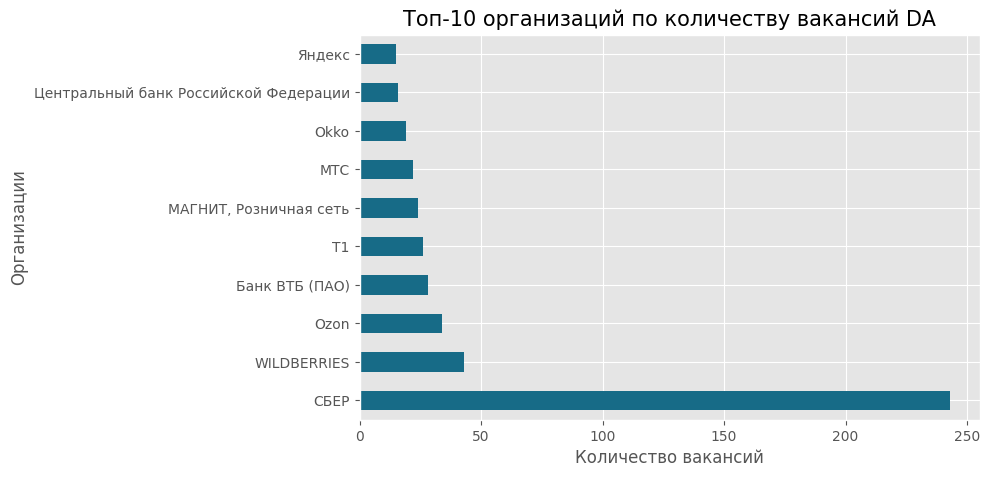

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
df_da['employer'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DA', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Абсолютный лидер по количеству вакансий DA - СБЕР, который разместил в 5 раз больше вакансий DA ближайшей WILDBERRIES. 

In [19]:
top_emp_ds = df_ds['employer'].value_counts().head(10)
top_emp_ds = top_emp_ds.reset_index()
top_emp_ds.columns = ['employer', 'total']
top_emp_ds

,employer,total
0,СБЕР,198
1,Ozon,36
2,Газпромбанк,24
3,Samokat.tech,20
4,Т1,19
5,Банк ВТБ (ПАО),18
6,WILDBERRIES,16
7,Ростелеком,12
8,Lamoda Tech,12
9,МегаФон,11


Топ-10 организаций по количеству вакансий DS. Визуализируем для наглядности.

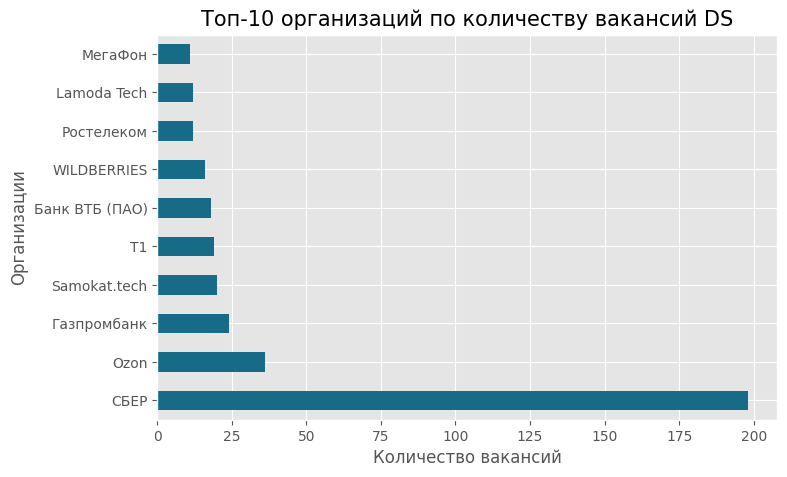

In [20]:
plt.figure(figsize=(8,5))
df_ds['employer'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DS', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Абсолютный лидер по количеству вакансий DS - СБЕР, который разместил почти в 6 раз больше вакансий DS ближайшего OZON. 

#### Неявные дубликаты по 4 столбцам 'name', 'employer', 'area', 'experience'

Проверим гипотезу с неявными дубликатами по 4 столбцам *'name', 'employer', 'area', 'experience'*.

In [21]:
df_da['employer'] = df_da['employer'].str.lower() # приводим к нижнему регистру столбец employer
df_da['name'] = df_da['name'].str.lower() # приводим к нижнему регистру столбец name
df_da.duplicated(['name', 'employer', 'area', 'experience']).sum()

420

In [22]:
df_ds['employer'] = df_ds['employer'].str.lower() # приводим к нижнему регистру столбец employer
df_ds['name'] = df_ds['name'].str.lower() # приводим к нижнему регистру столбец name
df_ds.duplicated(['name', 'employer', 'area', 'experience']).sum()

218

420 и 218 дублей это очень много. Посмотрим на них.

In [23]:
duplicates = df_da[['name', 'employer', 'area', 'experience']]
duplicates[duplicates.duplicated(keep=False)].sort_values(by=['name', 'employer', 'area', 'experience'])

,name,employer,area,experience
228,bi-аналитик / data analyst / аналитик данных,федеральная сеть книжных магазинов читай-город,Москва,Junior+ (1-3 years)
909,bi-аналитик / data analyst / аналитик данных,федеральная сеть книжных магазинов читай-город,Москва,Junior+ (1-3 years)
72,bi-аналитик/ аналитик данных,сэлвим,Москва,Junior+ (1-3 years)
1408,bi-аналитик/ аналитик данных,сэлвим,Москва,Junior+ (1-3 years)
215,bi-аналитик/бизнес-аналитик/аналитик данных,гоудрон,Москва,Junior+ (1-3 years)
...,...,...,...,...
1747,урбан-аналитик данных,mayak,Москва,Junior+ (1-3 years)
618,эксперт по цифровым технологиям аудита (data a...,сбер,Санкт-Петербург,Junior+ (1-3 years)
1656,эксперт по цифровым технологиям аудита (data a...,сбер,Санкт-Петербург,Junior+ (1-3 years)
1302,эксперт-аналитик данных в группу цифрового аудита,recruitment boutique s.m.art,Москва,Junior+ (1-3 years)


In [24]:
duplicates = df_ds[['name', 'employer', 'area', 'experience']]
duplicates[duplicates.duplicated(keep=False)].sort_values(by=['name', 'employer', 'area', 'experience'])

,name,employer,area,experience
10,cпециалист по работе с данными (data scientist),открытый код,Самара,Junior+ (1-3 years)
501,cпециалист по работе с данными (data scientist),открытый код,Самара,Junior+ (1-3 years)
85,data analyst (data science и клиентская аналит...,сбер,Москва,Middle (3-6 years)
575,data analyst (data science и клиентская аналит...,сбер,Москва,Middle (3-6 years)
832,data analyst (data science и клиентская аналит...,сбер,Москва,Middle (3-6 years)
...,...,...,...,...
303,эконометрист (junior data scientist),аналитический центр при правительстве российск...,Москва,Junior+ (1-3 years)
592,эконометрист (junior data scientist),аналитический центр при правительстве российск...,Москва,Junior+ (1-3 years)
11,эконометрист / data scientist,okkam,Москва,Middle (3-6 years)
517,эконометрист / data scientist,okkam,Москва,Middle (3-6 years)


Возможная причина таких дубликатов - при обновлении даты размещения вакансий создают новую вакансию с более свежей датой, вместо того чтобы обновить дату уже размещенной вакансии. Удалим строки с дубликатами.

In [25]:
df_da.sort_values(by='published_at', ascending=False) # отсортируем по дате
df_da.drop_duplicates (subset=['name', 'employer', 'area', 'experience'], keep='first', inplace=True) # удалим все дубликаты кроме первого
df_da.reset_index(drop=True).head()

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
0,100039284,junior аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100039284,dns головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД"
1,100039480,аналитик данных,2024-05-24,https://hh.ru/vacancy/100039480,комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel"
2,100042705,аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100042705,dns головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse"
3,100046788,ведущий аналитик данных,2024-05-24,https://hh.ru/vacancy/100046788,х5 group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич..."
4,100056244,аналитик данных,2024-05-24,https://hh.ru/vacancy/100056244,лукойл,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN


In [26]:
round((1 - (1381 / 1801)) * 100, 2)

23.32

Можно сделать вывод, что количество вакансий DA на 23 процента завышено.

Теперь сделаем тоже самое с DS.

In [27]:
df_ds.sort_values(by='published_at', ascending=False) # отсортируем по дате
df_ds.drop_duplicates (subset=['name', 'employer', 'area', 'experience'], keep='first', inplace=True) # удалим все дубликаты кроме первого
df_ds.reset_index(drop=True).head()

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
0,100049339,стажер data science (новосибирск),2024-05-24,https://hh.ru/vacancy/100049339,сбер,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN
1,100051447,data scientist,2024-05-24,https://hh.ru/vacancy/100051447,бюро кредитных историй скоринг бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ..."
2,100070495,ml engineer / data scientist,2024-05-24,https://hh.ru/vacancy/100070495,гк фск,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,..."
3,100076648,team lead data science,2024-05-24,https://hh.ru/vacancy/100076648,сбер,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN
4,100077910,data analyst / data scientist,2024-06-08,https://hh.ru/vacancy/100077910,итсен,NaN,Москва,Middle (3-6 years),"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000.0,NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,..."


In [28]:
round((1 - (756 / 974)) * 100, 2)

22.38

Количество вакансий DS тоже завышено почти на 23 процента.

Проверим топ-10 организаций по вакансиям DA после очистки дублей.

In [29]:
top_emp_da_new = df_da['employer'].value_counts().head(10)
top_emp_da_new = top_emp_da_new.reset_index()
top_emp_da_new.columns = ['employer_new', 'total_new']
top_emp_da_new

,employer_new,total_new
0,сбер,132
1,wildberries,26
2,банк втб (пао),25
3,ozon,22
4,мтс,21
5,"магнит, розничная сеть",19
6,центральный банк российской федерации,15
7,т1,14
8,okko,13
9,райффайзен банк,12


In [30]:
top_emp_da_new['employer_old'] = top_emp_da['employer']
top_emp_da_new['total_old'] = top_emp_da['total']
top_emp_da_new

,employer_new,total_new,employer_old,total_old
0,сбер,132,СБЕР,243
1,wildberries,26,WILDBERRIES,43
2,банк втб (пао),25,Ozon,34
3,ozon,22,Банк ВТБ (ПАО),28
4,мтс,21,Т1,26
5,"магнит, розничная сеть",19,"МАГНИТ, Розничная сеть",24
6,центральный банк российской федерации,15,МТС,22
7,т1,14,Okko,19
8,okko,13,Центральный банк Российской Федерации,16
9,райффайзен банк,12,Яндекс,15


С вакансиями DA картина по топ-10 организаций становится совершенно иной. Лидер по прежнему СБЕР - 132, а далее позиции сильно изменились.

In [31]:
top_emp_ds_new = df_ds['employer'].value_counts().head(10)
top_emp_ds_new = top_emp_ds_new.reset_index()
top_emp_ds_new.columns = ['employer_new', 'total_new']
top_emp_ds_new

,employer_new,total_new
0,сбер,120
1,ozon,26
2,газпромбанк,24
3,samokat.tech,19
4,банк втб (пао),16
5,т1,12
6,молвер,10
7,lamoda tech,10
8,wildberries,10
9,билайн,9


In [32]:
top_emp_ds_new['employer_old'] = top_emp_ds['employer']
top_emp_ds_new['total_old'] = top_emp_ds['total']
top_emp_ds_new

,employer_new,total_new,employer_old,total_old
0,сбер,120,СБЕР,198
1,ozon,26,Ozon,36
2,газпромбанк,24,Газпромбанк,24
3,samokat.tech,19,Samokat.tech,20
4,банк втб (пао),16,Т1,19
5,т1,12,Банк ВТБ (ПАО),18
6,молвер,10,WILDBERRIES,16
7,lamoda tech,10,Ростелеком,12
8,wildberries,10,Lamoda Tech,12
9,билайн,9,МегаФон,11


С вакансиями DS картина по организациям топ-10 более стабильна. Лидеры не изменились, небольшие изменения с 5 по 10 место, но в целом почти не изменилась.

### Столбец department

Столбец представляет собой наименование отдела организации, разместившей вакансию, который получился из названия виджета страницы с вакансией на hh.ru.

In [33]:
df_da['department'].isna().sum()

1049

In [34]:
df_ds['department'].isna().sum()

469

1049 пропусков в DA и 469 пропусков в DS. Не будем заполнять пропуски, информация является дополнительной для предыдущего столбца *'employer'*, из которой можно понять направление аналитики в которой требуется специалист.

### Столбец area

Столбец представляет собой город размещения выкансии, который берут из строки с адресом на странице с вакансией на hh.ru. 

In [35]:
df_da['area'].nunique() # узнаем количество городов

70

In [36]:
df_da['area'].sort_values().unique() # выведем уникальные значения

array(['Адыгейск', 'Алтайское', 'Артем', 'Байбек', 'Балашиха', 'Белгород',
       'Вейделевка', 'Великие Луки', 'Вельск', 'Верхняя Пышма',
       'Владивосток', 'Владимир', 'Волгоград', 'Воронеж', 'Горно-Алтайск',
       'Дзержинский', 'Дмитров', 'Екатеринбург', 'Златоуст',
       'Иваново (Ивановская область)', 'Ижевск', 'Иркутск', 'Казань',
       'Калининград', 'Кемерово', 'Киров (Кировская область)', 'Королев',
       'Краснодар', 'Красноярск', 'Курган', 'Липецк', 'Луховицы',
       'Магнитогорск', 'Майкоп', 'Москва', 'Мытищи', 'Набережные Челны',
       'Нефтекамск', 'Нижний Новгород', 'Новосибирск', 'Одинцово', 'Омск',
       'Оренбург', 'Пермь', 'Подольск (Московская область)', 'Псков',
       'Пушкино (Московская область)', 'Ростов-на-Дону', 'Рязань',
       'Самара', 'Санкт-Петербург', 'Саратов',
       'Северск (Томская область)', 'Симферополь', 'Смоленск', 'Сочи',
       'Ступино', 'Тверь', 'Тольятти', 'Томск', 'Тула', 'Турочак',
       'Тюмень', 'Ульяновск', 'Уфа', 'Химки',

In [37]:
df_da['area'].value_counts().head(10) # определим топ-10 городов

area
Москва             921
Санкт-Петербург    143
Екатеринбург        39
Новосибирск         29
Нижний Новгород     27
Казань              25
Владивосток         23
Краснодар           19
Ростов-на-Дону       9
Пермь                9
Name: count, dtype: int64

Визуализируем для наглядности.

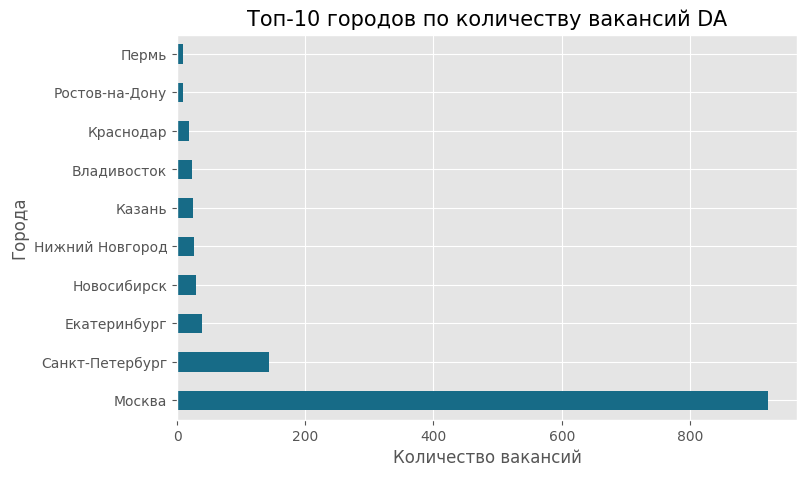

In [38]:
plt.figure(figsize=(8,5))
df_da['area'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 городов по количеству вакансий DA', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Города', fontsize=12);

In [39]:
df_ds['area'].nunique()

26

In [40]:
df_ds['area'].sort_values().unique() # выведем уникальные значения

array(['Верхняя Пышма', 'Владивосток', 'Воронеж', 'Екатеринбург',
       'Ижевск', 'Казань', 'Калининград', 'Краснодар', 'Липецк', 'Москва',
       'Нижний Новгород', 'Новосибирск', 'Омск', 'Пермь',
       'Ростов-на-Дону', 'Самара', 'Санкт-Петербург', 'Сочи', 'Таганрог',
       'Тамбов', 'Томск', 'Тюмень', 'Уфа', 'Челябинск', 'Южно-Сахалинск',
       'Ярославль'], dtype=object)

In [41]:
df_ds['area'].value_counts().head(10) # определим топ-10 городов

area
Москва             580
Санкт-Петербург     73
Новосибирск         22
Екатеринбург        17
Нижний Новгород     13
Казань              12
Томск                5
Самара               4
Краснодар            4
Сочи                 3
Name: count, dtype: int64

Визуализируем для наглядности.

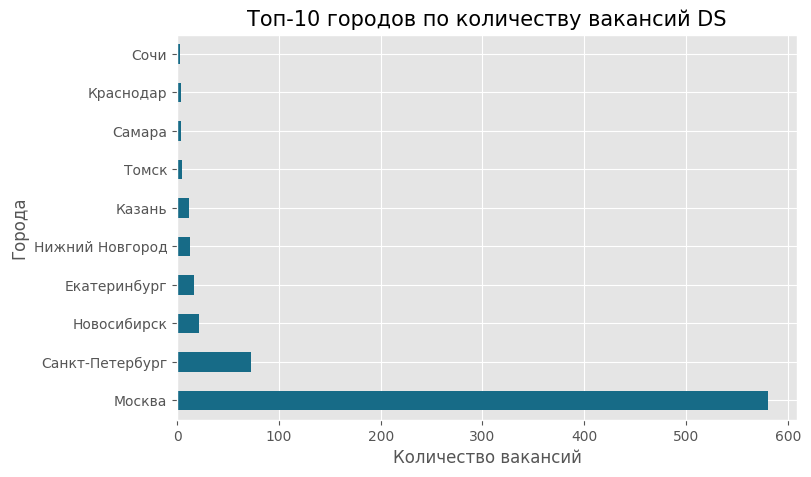

In [42]:
plt.figure(figsize=(8,5))
df_ds['area'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 городов по количеству вакансий DS', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Города', fontsize=12);

Как уже написано ранее, вакансии по поиску DA размещены в 70 городах, DS - в 26 городах. Аномалий не обнаружено.
Абсолютные лидеры по вакансиям Москва и Санкт-Петербург, что не удивительно. Далее в топ-10 входят города миллионники областных центров, что тоже не удивительно.

### Столбец experience

Столбец представляет собой требуемый опыт работы, информацию берут из заголовка вакансии на hh.ru.

In [43]:
df_da['id'].count()

1381

Всего 1381 вакансия DA. Посмотрим как они распределены по категориям опыта.

In [44]:
df_da_exp = df_da['experience'].value_counts().reset_index() # посчитаем количество каждой группы
df_da_exp['part'] = round((df_da_exp['count'] / df_da_exp['count'].sum()) * 100, 2) # отобразим доли
df_da_exp

,experience,count,part
0,Junior+ (1-3 years),830,60.10
1,Middle (3-6 years),422,30.56
2,Junior (no experince),119,8.62
3,Senior (6+ years),10,0.72


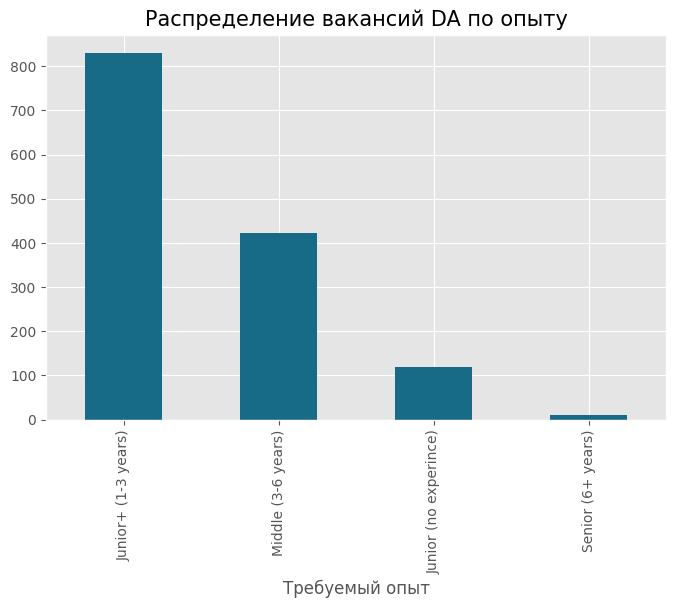

In [45]:
plt.figure(figsize=(8,5))
df_da['experience'].value_counts().plot.bar(color='#176B87')
plt.title('Распределение вакансий DA по опыту', fontsize=15)
plt.xlabel('Требуемый опыт', fontsize=12);

In [46]:
df_ds['id'].count()

756

Всего 756 вакансий DS. Посмотрим как они распределены по категориям опыта.

In [47]:
df_ds_exp = df_ds['experience'].value_counts().reset_index() # посчитаем количество каждой группы
df_ds_exp['part'] = round((df_ds_exp['count'] / df_ds_exp['count'].sum()) * 100, 2) # отобразим доли
df_ds_exp

,experience,count,part
0,Middle (3-6 years),359,47.49
1,Junior+ (1-3 years),330,43.65
2,Junior (no experince),39,5.16
3,Senior (6+ years),28,3.70


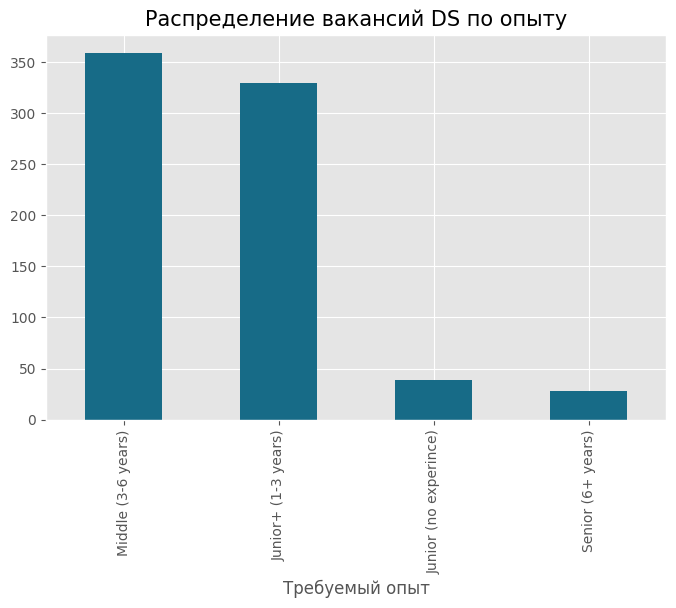

In [48]:
plt.figure(figsize=(8,5))
df_ds['experience'].value_counts().plot.bar(color='#176B87')
plt.title('Распределение вакансий DS по опыту', fontsize=15)
plt.xlabel('Требуемый опыт', fontsize=12);

Всего 4 категории: Junior (no experince), Junior+ (1-3 years), Middle (3-6 years), Senior (6+ years). По количеству требуемых специалистов наблюдается принципиальная разница. У DA из 1381 вакансии больше всех требуется Junior+ (1-3 years) - 60 % всезх вакансий, далее в 2 раза меньше Middle (3-6 years) - 30 %, затем Junior (no experince) - 8 % и Senior (6+ years) - менее 1 %.<br>
А у DS из 756 вакансий почти на одном уровне требуются Middle (3-6 years) - 47 % и  Junior+ (1-3 years) - 43 %, вакансий Junior (no experince) и Senior (6+ years) значительно меньше - 5 % и 3 %.

### Столбец key_skills

Столбец представляет собой списки ключевых навыков, найденные при анализе 
полного текстастраницы  вакансии на hh.ru.

In [49]:
df_da['key_skills'].unique()

array(["['Power BI', 'СУБД', 'Python', 'SQL']",
       "['MS SQL', 'Работа с базами данных', 'MS Excel']",
       "['SQL', 'Power BI', 'СУБД', 'Python', 'Clickhouse', 'BPMN']",
       "['Анализ данных', 'Коммуникация', 'SQL', 'MS Office', 'Управление командой', 'Python', 'Работа с большим объемом информации', 'Навыки презентации', 'Аналитика', 'Умение принимать решения', 'Hadoop', 'Аналитические исследования', 'Pandas', 'Деловая коммуникация', 'Юнит-экономика', 'Нive']",
       "['Документация']",
       "['Python', 'SQL', 'Математическая статистика']", '[]',
       "['Документация', 'Проактивность', 'Коммуникация']",
       "['Аналитическое мышление']", "['Pandas']",
       "['Linux', 'SQL', 'Бизнес-анализ', 'Hadoop', 'Big Data', 'Data Scientist', 'PostgreSQL', 'Аналитическое мышление', 'MS SQL', 'DataLens', 'Аналитика', 'Статистический анализ', 'Spark', 'Английский язык', 'Python', 'Data Analysis', 'Data Mining', 'QlikView', 'Обучение и развитие']",
       "['Linux', 'SQL', 'поведени

In [50]:
df_ds['key_skills'].unique()

array(['[]',
       "['Python', 'Hadoop', 'Machine Learning', 'Работа с базами данных', 'Математический анализ', 'Статистический анализ', 'MS SQL', 'SQL', 'Spark', 'Big Data', 'Аналитические исследования', 'Аналитическое мышление', 'Pandas', 'Документация', 'Математическая статистика']",
       "['Python', 'PyTorch', 'Machine Learning', 'Docker', 'Deep Learning', 'SQL', 'Data Science', 'NLP', 'Pandas', 'ML']",
       "['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналитическое мышление', 'Data Scientist', 'Python', 'PostgreSQL', 'Аналитика', 'Data Mining', 'Английский язык', 'Обучение и развитие', 'QlikView', 'Hadoop', 'Статистический анализ', 'Data Analysis', 'Big Data', 'Linux', 'Бизнес-анализ']",
       "['Python', 'sklearn', 'PostgreSQL', 'numpy', 'ml', 'scipy', 'Pandas', 'Документация', 'pandas', 'Clickhouse']",
       "['Python', 'Machine Learning', 'SQL', 'Big Data', 'Pandas', 'Git']",
       "['Python', 'Документация', 'SQL']",
       "['Python', 'Работа с базами данных', 'Статистика

Значения столбца представляют собой *списки обернутые в строку*, также присутствуют пустые списки - "[]". Найдём количество таких вакансий.

In [51]:
df_da.query('key_skills == "[]"')['key_skills'].count()

273

In [52]:
df_ds.query('key_skills == "[]"')['key_skills'].count()

128

273 и 128 - это много, удалить не получится. Необходимо заменить на частотные значения. Найдём их.

In [53]:
# превращаем список обернутый в строку в список
list_key_skills = []
for i in df_da['key_skills']:
    i = eval(i)
    list_key_skills.append(i)

In [54]:
# объединяем список списков в единый список
big_list_key_skills = []
for i in list_key_skills:
    for z in i:
        big_list_key_skills.append(z)
all_key = pd.DataFrame(big_list_key_skills)

all_key.columns = ['skills']

all_key.head()

,skills
0,Power BI
1,СУБД
2,Python
3,SQL
4,MS SQL


Теперь можем посмотреть на самые требуемые навыки.

In [55]:
all_key.value_counts().head(10)

skills                             
SQL                                    602
Python                                 452
Анализ данных                          332
Аналитическое мышление                 300
Pandas                                 230
Документация                           211
Power BI                               183
MS Excel                               168
Работа с базами данных                 155
Работа с большим объемом информации    149
Name: count, dtype: int64

Нашли топ-10 самых востребованных навыков для аналитиков данных.<br>
Теперь создадим функцию для определения навыков, для того чтобы выделить навыки в зависимости от категории требуемого опыта, а затем заполнить наиболее частотными значениями пропуски в столбце.

In [56]:
def top_skills(series):
    # убираем "обёртку" от строки и сохраняем в отдельный список - получится список списков
    list_top_skills = []
    for i in series:
        i = eval(i)
        list_top_skills.append(i)

    # перебираем списки, а затем элементы списка и сохраняем в общий список
    big_list_top_skills = []
    for i in list_top_skills:
        for z in i:
            big_list_top_skills.append(z)

    # конвертируем список в датафрейм
    df_skills = pd.DataFrame(big_list_top_skills)

    df_skills.columns = ['skills']

    return df_skills

In [57]:
# нарезаем датафреймы по требуемому опыту
df_da_jun1 = df_da.query('experience == "Junior (no experince)"')
df_da_jun2 = df_da.query('experience == "Junior+ (1-3 years)"')
df_da_mid = df_da.query('experience == "Middle (3-6 years)"')
df_da_sen = df_da.query('experience == "Senior (6+ years)"')

#### Заполнение пропусков стлбца 'key_skills' DA

Теперь воспользуемся нашей функцией для каждого датафрейма и выведем топ-10 навыков. А затем заменим пропуски на 5 самых чатотных навыков.

In [58]:
top_skills(df_da_jun1['key_skills']).value_counts().head(10)

skills                             
Аналитическое мышление                 33
SQL                                    30
Анализ данных                          27
Python                                 26
MS Excel                               25
Работа с большим объемом информации    17
Pandas                                 15
Коммуникация                           15
Документация                           15
Базы данных                            12
Name: count, dtype: int64

Получили топ-10 навыков для DA уровня Junior (no experince). Среди основных требований: Аналитическое мышление, SQL, Анализ данных.

Заменим пропуски на 5 самых популярных навыков. 

In [59]:
df_da.loc[(df_da['experience'] == 'Junior (no experince)') & (df_da['key_skills'] == '[]'), 'key_skills'] = \
    "['Аналитическое мышление', 'SQL', 'Анализ данных', 'Python', 'MS Excel']"

In [60]:
df_da.loc[(df_da['experience'] == 'Junior (no experince)') & (df_da['key_skills'] == '[]')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


Проделаем то же самое для остальных категорий DA. На очереди Junior+ (1-3 years).

In [61]:
top_skills(df_da_jun2['key_skills']).value_counts().head(10)

skills                             
SQL                                    371
Python                                 249
Анализ данных                          213
Аналитическое мышление                 198
Pandas                                 131
MS Excel                               114
Power BI                               114
Документация                           111
Работа с базами данных                 105
Работа с большим объемом информации     99
Name: count, dtype: int64

В целом набор требований изменился не сильно, изменились места. Для Junior+ (1-3 years) обязательным является SQL, Python и Анализ данных.

In [62]:
df_da.loc[(df_da['experience'] == 'Junior+ (1-3 years)') & (df_da['key_skills'] == '[]'), 'key_skills'] = \
    "['SQL', 'Python', 'Анализ данных', 'Аналитическое мышление', 'Pandas']"

In [63]:
df_da.loc[(df_da['experience'] == 'Junior+ (1-3 years)') & (df_da['key_skills'] == '[]')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


Переходим к Middle (3-6 years).

In [64]:
top_skills(df_da_mid['key_skills']).value_counts().head(10)

skills                
SQL                       195
Python                    171
Анализ данных              91
Документация               83
Pandas                     82
Аналитическое мышление     67
Power BI                   59
Data Analysis              48
Коммуникация               45
Работа с базами данных     40
Name: count, dtype: int64

В целом набор требований также не сильно изменился. Для Middle (3-6 years) также обязательным является SQL, Python. Чуть меньше требуется Анализ данных, Документация и Pandas

In [65]:
df_da.loc[(df_da['experience'] == 'Middle (3-6 years)') & (df_da['key_skills'] == '[]'), 'key_skills'] = \
    "['SQL', 'Python', 'Анализ данных', 'Документация', 'Pandas']"

In [66]:
df_da.loc[(df_da['experience'] == 'Middle (3-6 years)') & (df_da['key_skills'] == '[]')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


Идём к Senior (6+ years).

In [67]:
top_skills(df_da_sen['key_skills']).value_counts().head(10)

skills                    
SQL                           6
Python                        6
Power BI                      3
Проактивность                 3
Pandas                        2
Аналитическое мышление        2
Аналитические исследования    2
Документация                  2
confluence                    2
Tableau                       2
Name: count, dtype: int64

Для Senior (6+ years) помимо SQL и Python становится обязательным требованием владение Power BI и Проактивность. Также появляется требование владеть confluence и Tableau.

In [68]:
df_da.loc[(df_da['experience'] == 'Senior (6+ years)') & (df_da['key_skills'] == '[]'), 'key_skills'] = \
    "['SQL', 'Python', 'Power BI', 'Проактивность', 'Pandas']"

In [69]:
df_da.loc[(df_da['experience'] == 'Senior (6+ years)') & (df_da['key_skills'] == '[]')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


#### Заполнение пропусков стлбца 'key_skills' DS

Разобрались с пропусками в вакансиях DA. Переходим к DS. Выполним те же операции: нарежем датафреймы по группам опыта. Воспользовавшись функцией, найдём топ-10 навыков каждой группы и заменим пропуски на 5 самых востребованных.

In [70]:
# нарезаем датафреймы по требуемому опыту
df_ds_jun1 = df_ds.query('experience == "Junior (no experince)"')
df_ds_jun2 = df_ds.query('experience == "Junior+ (1-3 years)"')
df_ds_mid = df_ds.query('experience == "Middle (3-6 years)"')
df_ds_sen = df_ds.query('experience == "Senior (6+ years)"')

Первая группа Junior (no experince).

In [71]:
top_skills(df_ds_jun1['key_skills']).value_counts().head(10)

skills                   
Python                       17
Математическая статистика     9
Data Mining                   7
Pandas                        6
Git                           6
Machine Learning              5
Машинное обучение             5
Документация                  4
ML                            4
Анализ данных                 3
Name: count, dtype: int64

В топ-10 требований для DS Junior (no experince) попадают: Python, Машинное обучение, Математическая статистика, Data Mining. Сразу видны первые отличия от требований для DA - появились Математическая статистика, Git, Машинное обучение.

In [72]:
df_ds.loc[(df_ds['experience'] == 'Junior (no experince)') & (df_ds['key_skills'] == '[]'), 'key_skills'] = \
    "['Python', 'Математическая статистика', 'Data Mining', 'Pandas', 'Git']"

In [73]:
df_ds.loc[(df_ds['experience'] == 'Junior (no experince)') & (df_ds['key_skills'] == '[]')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


Переходим к категории Junior+ (1-3 years).

In [74]:
top_skills(df_ds_jun2['key_skills']).value_counts().head(10)

skills                   
Python                       152
Pandas                       145
SQL                          107
Machine Learning              51
Документация                  44
Коммуникация                  37
Математическая статистика     32
ML                            28
Big Data                      28
Data Science                  26
Name: count, dtype: int64

Для Junior+ (1-3 years) обязательными являютя - Python, Pandas, SQL. Чуть менее желаемы  Machine Learning и Документация.

In [75]:
df_ds.loc[(df_ds['experience'] == 'Junior+ (1-3 years)') & (df_ds['key_skills'] == '[]'), 'key_skills'] = \
    "['Python', 'Pandas', 'SQL', 'Machine Learning', 'Документация']"

In [76]:
df_ds.loc[(df_ds['experience'] == 'Junior+ (1-3 years)') & (df_ds['key_skills'] == '[]')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


Далее Middle (3-6 years).

In [77]:
top_skills(df_ds_mid['key_skills']).value_counts().head(10)

skills          
Python              167
Pandas              121
SQL                  89
Документация         70
ML                   51
Machine Learning     47
Коммуникация         47
Data Science         32
confluence           29
NLP                  29
Name: count, dtype: int64

Для Middle (3-6 years) специалистов требования не изменились. Обязательны Python, Pandas, Machine Learning, SQL и Документация.

In [78]:
df_ds.loc[(df_ds['experience'] == 'Middle (3-6 years)') & (df_ds['key_skills'] == '[]'), 'key_skills'] = \
    "['Python', 'Pandas', 'SQL', 'Machine Learning', 'Документация']"

In [79]:
df_ds.loc[(df_ds['experience'] == 'Middle (3-6 years)') & (df_ds['key_skills'] == '[]')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


Остались Senior (6+ years).

In [80]:
top_skills(df_ds_sen['key_skills']).value_counts().head(10)

skills             
Python                 12
Документация            7
Pandas                  7
ML                      5
Data Science            4
PyTorch                 4
Machine Learning        4
SQL                     4
Управление командой     3
Коммуникация            3
Name: count, dtype: int64

Основные требования - Python, Machine Learning, Документация и Pandas. Добавились также Управление командой и Коммуникация - потому что специалисты такого уровня, как правило, являются лидами команды.

In [81]:
df_ds.loc[(df_ds['experience'] == 'Senior (6+ years)') & (df_ds['key_skills'] == '[]'), 'key_skills'] = \
    "['Python', 'Pandas', 'Data Science', 'Machine Learning', 'Документация']"

In [82]:
df_ds.loc[(df_ds['experience'] == 'Senior (6+ years)') & (df_ds['key_skills'] == '[]')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


### Столбец schedule

Столбец представляет собой тип графика работы, который указывается в заголовке вакансии на hh.ru.

In [83]:
df_da['schedule'].value_counts()

schedule
Полный день         1097
Удаленная работа     247
Гибкий график         31
Сменный график         6
Name: count, dtype: int64

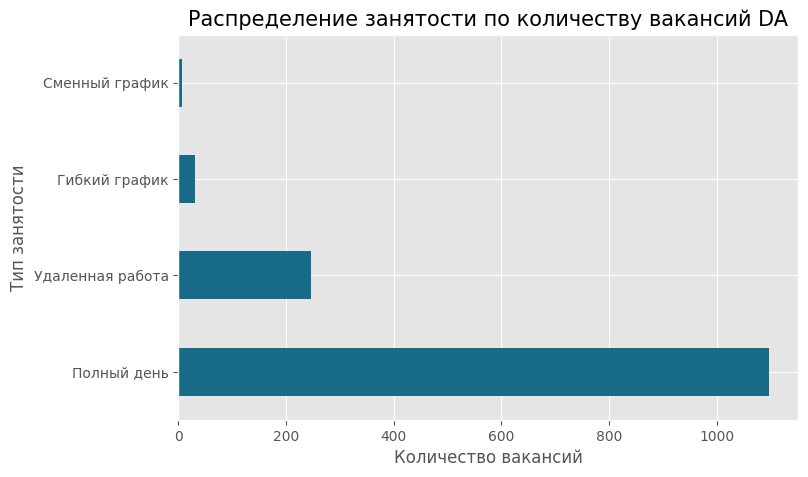

In [84]:
plt.figure(figsize=(8,5))
df_da['schedule'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Распределение занятости по количеству вакансий DA', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Тип занятости', fontsize=12);

Абсолютное большинство работодателей хотели бы задействовать специалистов DA на полный рабочий день - 1097 вакансий, в 4 раза меньше на удалённой работе - 247 вакансий, ещё в 8 раз меньше на гибком графике - 31 и 8 вакансий на сменном графике.

In [85]:
df_ds['schedule'].value_counts()

schedule
Полный день         548
Удаленная работа    167
Гибкий график        38
Сменный график        3
Name: count, dtype: int64

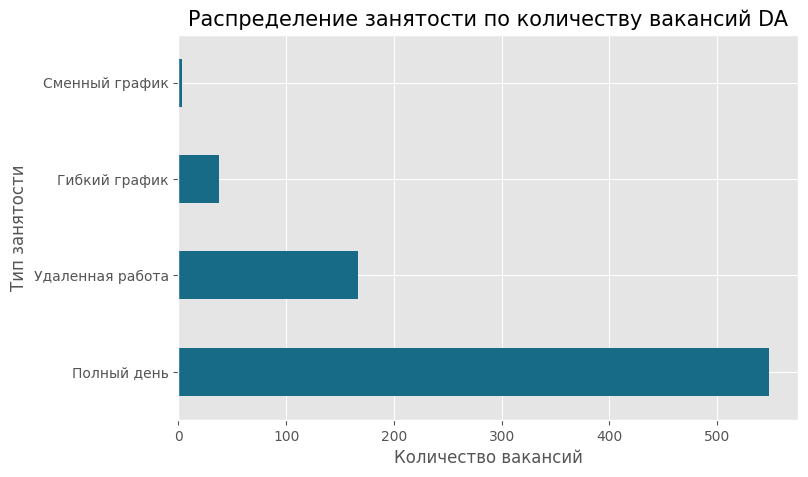

In [86]:
plt.figure(figsize=(8,5))
df_ds['schedule'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Распределение занятости по количеству вакансий DA', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Тип занятости', fontsize=12);

Почти такая же картина наблюдается у DS. Такой же порядок, но немного другие пропорции.

В целом анамалий не выявленно.

### Столбец employment

Столбец представляет собой тип занятости, также полученный из заголовка вакансии на hh.ru.

In [87]:
df_da['employment'].value_counts()

employment
Полная занятость       1350
Стажировка               14
Частичная занятость      13
Проектная работа          4
Name: count, dtype: int64

In [88]:
df_ds['employment'].value_counts()

employment
Полная занятость       726
Стажировка              17
Частичная занятость      8
Проектная работа         5
Name: count, dtype: int64

Аномалий не выявленно. Абсолютное большинство работодателей предлагают полную занятость - около 97 % и на 3 % приходится - стажировка, частичная занятость, проектная работа.

### Столбец description

Столбец представляет собой описание вакансии, полученный из описания в тексте вакансии на hh.ru.



In [89]:
df_da['description'].unique()

array(['наше направление занимается повышением эффективности каналов продаж и улучшением взаимодействия с клиентами. для достижения этой цели мы собираем очень много данных о работе наших магазинов, создаем и развиваем систему отчетности, а также проводим различные исследования для бизнеса и принимаем участие в бизнес-проектах направления.  мы в поиске аналитика данных, который хочет:- много работать с данными - проводить исследования - помогать бизнесу находить ответы на интересующие вопросы твои основные задачи:  участие в процессе исследований: сбор необходимых данных и их последующая обработка; проверка гипотез; оформление выводов, интерпретация результатов написание ad-hoc запросов постановка задач на автоматизацию сбора данных разработка дашбордов  что мы ждем от тебя:    уверенное владение sql    базовые знания статистики  развитые коммуникативные навыки критическое мышление  будет плюсом:     опыт работы с python  знания основных концепций в работе с данными (типы данных, метод

### Столбец description_lemmatized

Столбец представляет собой лемматизированное описание вакансии, т. е. все слова из описания находятся в своей начальной форме.

In [90]:
df_da['description_lemmatized'].unique()

array(['наш направление заниматься повышение эффективность канал продажа улучшение взаимодействие клиент достижение цель собирать данные работа наш магазин создавать развивать система отчетность также проводить различный исследование бизнес принимать участие бизнес проект направление поиск аналитик данные хотеть работать данный проводить исследование помогать бизнес находить ответ интересовать вопрос твой основной задача участие процесс исследование сбор необходимый данные последующий обработка проверка гипотеза оформление вывод интерпретация результат написание ad hoc запрос постановка задача автоматизация сбор данный разработка дашборд ждать уверенный владение sql базовый знание статистика развитый коммуникативный навык критический мышление плюс опыт работа python знание основной концепция работа данные тип данные метод простой обработка агрегация фильтрация опыт работа bi система условие действовать система грейд заработный плата зависеть навык знание рост необходимо обучаться закре

Столбцы description и description_lemmatized могут быть использованы только для поиска узкоспециализированных навыков. Поэтому в исследовании участие принимать не будут.

### Столбец salary_from

Столбец представляет собой нижнюю границу предлагаемой заработной платы, полученная из заголовка вакансии на hh.ru.

In [91]:
df_da['salary_from'].isna().sum()

1086

In [92]:
df_ds['salary_from'].isna().sum()

678

1086 и 678 пропусков - это очень много. Найдём медианные значения для каждой группы в соответствии с опытом и заполним ими пропуски.

In [93]:
# нарезаем датафреймы по требуемому опыту
df_da_jun1 = df_da.query('experience == "Junior (no experince)"')
df_da_jun2 = df_da.query('experience == "Junior+ (1-3 years)"')
df_da_mid = df_da.query('experience == "Middle (3-6 years)"')
df_da_sen = df_da.query('experience == "Senior (6+ years)"')

In [94]:
df_da_jun1['salary_from'].median()

60000.0

In [95]:
df_da_jun2['salary_from'].median()

90000.0

In [96]:
df_da_mid['salary_from'].median()

150000.0

In [97]:
df_da_sen['salary_from'].median()

200000.0

Чёткие границы по зарплатам в зависимости от уроня опыта:<br>
- Junior (no experince) - 60 тыс.
- Junior+ (1-3 years) - 90 тыс.
- Middle (3-6 years) - 150 тыс.
- Senior (6+ years) - 200 тыс.

Проведем замену пропусков DA на медианные значения.

In [98]:
df_da.loc[(df_da['salary_from'].isna()) & (df_da['experience'] == 'Junior (no experince)'), 'salary_from'] = 60000

In [99]:
df_da.loc[(df_da['salary_from'].isna()) & (df_da['experience'] == 'Junior (no experince)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [100]:
df_da.loc[(df_da['salary_from'].isna()) & (df_da['experience'] == 'Junior+ (1-3 years)'), 'salary_from'] = 90000

In [101]:
df_da.loc[(df_da['salary_from'].isna()) & (df_da['experience'] == 'Junior+ (1-3 years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [102]:
df_da.loc[(df_da['salary_from'].isna()) & (df_da['experience'] == 'Middle (3-6 years)'), 'salary_from'] = 150000

In [103]:
df_da.loc[(df_da['salary_from'].isna()) & (df_da['experience'] == 'Middle (3-6 years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [104]:
df_da.loc[(df_da['salary_from'].isna()) & (df_da['experience'] == 'Senior (6+ years)'), 'salary_from'] = 200000

In [105]:
df_da.loc[(df_da['salary_from'].isna()) & (df_da['experience'] == 'Senior (6+ years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


Теперь то же для DS.

In [106]:
# нарезаем датафреймы по требуемому опыту
df_ds_jun1 = df_ds.query('experience == "Junior (no experince)"')
df_ds_jun2 = df_ds.query('experience == "Junior+ (1-3 years)"')
df_ds_mid = df_ds.query('experience == "Middle (3-6 years)"')
df_ds_sen = df_ds.query('experience == "Senior (6+ years)"')

In [107]:
df_ds_jun1['salary_from'].median()

60000.0

In [108]:
df_ds_jun2['salary_from'].median()

105000.0

In [109]:
df_ds_mid['salary_from'].median()

200000.0

In [110]:
df_ds_sen['salary_from'].median()

160000.0

По сравнению с DA картина следующая:
- Junior (no experince) - 60 тыс., что одинаково
- Junior+ (1-3 years) - 105 тыс., что на 15 больше, чем у DA
- Middle (3-6 years) - 200 тыс., что на 50 больше, чем у DA и соответствует уровню сеньор у DA
- Senior (6+ years) - 160 тыс., связано с тем, что имеется одно единственное значение, которое не соответствует рыночным значениям.

Заменим пропуски на медианные значения, исключением станет группа Senior (6+ years), в которой пропуски заменим на 250 тыс.

In [111]:
df_ds.loc[(df_ds['salary_from'].isna()) & (df_ds['experience'] == 'Junior (no experince)'), 'salary_from'] = 60000

In [112]:
df_ds.loc[(df_ds['salary_from'].isna()) & (df_ds['experience'] == 'Junior (no experince)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [113]:
df_ds.loc[(df_ds['salary_from'].isna()) & (df_ds['experience'] == 'Junior+ (1-3 years)'), 'salary_from'] = 105000

In [114]:
df_ds.loc[(df_ds['salary_from'].isna()) & (df_ds['experience'] == 'Junior+ (1-3 years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [115]:
df_ds.loc[(df_ds['salary_from'].isna()) & (df_ds['experience'] == 'Middle (3-6 years)'), 'salary_from'] = 200000

In [116]:
df_ds.loc[(df_ds['salary_from'].isna()) & (df_ds['experience'] == 'Middle (3-6 years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [117]:
df_ds.loc[(df_ds['salary_from'].isna()) & (df_ds['experience'] == 'Senior (6+ years)'), 'salary_from'] = 250000

In [118]:
df_ds.loc[(df_ds['salary_from'].isna()) & (df_ds['experience'] == 'Senior (6+ years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [119]:
df_da['salary_from'].isna().sum()

0

In [120]:
df_ds['salary_from'].isna().sum()

0

In [121]:
df_da['salary_from'] = df_da['salary_from'].astype(int)
df_ds['salary_from'] = df_ds['salary_from'].astype(int)

Провели замену пропусков столбца salary_from на медианные значения, за исключением группы Senior (6+ years) у DS. Также изменили тип данных на int.

### Столбец salary_to

Столбец представляет собой верхнюю границу предлагаемой заработной платы, полученная из заголовка вакансии на hh.ru. Проведём те же манипуляции как со столбцом salary_from.

In [122]:
df_da['salary_to'].isna().sum()

1186

In [123]:
df_ds['salary_to'].isna().sum()

688

1186 и 688 пропусков - это ещё больше чем в предыдущем столбце. Найдём медианные значения для каждой группы в соответствии с опытом и заполним ими пропуски.

In [124]:
df_da_jun1['salary_to'].median()

80000.0

In [125]:
df_da_jun2['salary_to'].median()

120000.0

In [126]:
df_da_mid['salary_to'].median()

200000.0

In [127]:
df_da_sen['salary_to'].median()

240000.0

Такие же чёткие границы по зарплатам в зависимости от уроня опыта:<br>
- Junior (no experince) - 80 тыс.
- Junior+ (1-3 years) - 120 тыс.
- Middle (3-6 years) - 200 тыс.
- Senior (6+ years) - 240 тыс.

Проведем замену пропусков DA на медианные значения.

In [128]:
df_da.loc[(df_da['salary_to'].isna()) & (df_da['experience'] == 'Junior (no experince)'), 'salary_to'] = 80000

In [129]:
df_da.loc[(df_da['salary_to'].isna()) & (df_da['experience'] == 'Junior (no experince)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [130]:
df_da.loc[(df_da['salary_to'].isna()) & (df_da['experience'] == 'Junior+ (1-3 years)'), 'salary_to'] = 120000

In [131]:
df_da.loc[(df_da['salary_to'].isna()) & (df_da['experience'] == 'Junior+ (1-3 years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [132]:
df_da.loc[(df_da['salary_to'].isna()) & (df_da['experience'] == 'Middle (3-6 years)'), 'salary_to'] = 200000

In [133]:
df_da.loc[(df_da['salary_to'].isna()) & (df_da['experience'] == 'Middle (3-6 years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [134]:
df_da.loc[(df_da['salary_to'].isna()) & (df_da['experience'] == 'Senior (6+ years)'), 'salary_to'] = 240000

In [135]:
df_da.loc[(df_da['salary_to'].isna()) & (df_da['experience'] == 'Senior (6+ years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


Теперь проведем замены у DS. Найдём медианные значения для каждой группы.

In [136]:
df_ds_jun1['salary_to'].median()

80000.0

In [137]:
df_ds_jun2['salary_to'].median()

200000.0

In [138]:
df_ds_mid['salary_to'].median()

300000.0

In [139]:
df_ds_sen['salary_to'].median()

300000.0

По сравнению с DA картина следующая:
- Junior (no experince) - 80 тыс., что одинаково
- Junior+ (1-3 years) - 200 тыс., что на 80 больше, чем у DA
- Middle (3-6 years) - 300 тыс., что на 100 больше
- Senior (6+ years) - 300 тыс., связано с тем, что имеется всего 3 значения

In [140]:
df_ds.loc[(df_ds['salary_to'].isna()) & (df_ds['experience'] == 'Junior (no experince)'), 'salary_to'] = 80000

In [141]:
df_ds.loc[(df_ds['salary_to'].isna()) & (df_ds['experience'] == 'Junior (no experince)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [142]:
df_ds.loc[(df_ds['salary_to'].isna()) & (df_ds['experience'] == 'Junior+ (1-3 years)'), 'salary_to'] = 200000

In [143]:
df_ds.loc[(df_ds['salary_to'].isna()) & (df_ds['experience'] == 'Junior+ (1-3 years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [144]:
df_ds.loc[(df_ds['salary_to'].isna()) & (df_ds['experience'] == 'Middle (3-6 years)'), 'salary_to'] = 300000

In [145]:
df_ds.loc[(df_ds['salary_to'].isna()) & (df_ds['experience'] == 'Middle (3-6 years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [146]:
df_ds.loc[(df_ds['salary_to'].isna()) & (df_ds['experience'] == 'Senior (6+ years)'), 'salary_to'] = 350000

In [147]:
df_ds.loc[(df_ds['salary_to'].isna()) & (df_ds['experience'] == 'Senior (6+ years)')]

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field


In [148]:
df_da['salary_to'].isna().sum()

0

In [149]:
df_ds['salary_to'].isna().sum()

0

In [150]:
df_da['salary_to'] = df_da['salary_to'].astype(int)
df_ds['salary_to'] = df_ds['salary_to'].astype(int)

Провели замену пропусков столбца salary_to на медианные значения, за исключением группы Senior (6+ years) у DS. Также изменили тип данных на int.

### Столбец salary_bin

Столбец представляет собой категорию предлагаемой заработной платы.

In [151]:
df_da['salary_bin'].value_counts()

salary_bin
ЗП не указана                1186
От 100 тысяч до 200 тысяч      85
Меньше 100 тысяч               57
От 200 тысяч до 300 тысяч      32
Больше 300 тысяч               21
Name: count, dtype: int64

Всего 5 категорий в зависимости от уровня зароботной платы. Из которых 1186 вакансий в которых заработная плата не указана. Но после того, как мы заменили пропуски в предыдущих столбцах, в данном столбце информация стала не достоверной.

### Столбец key_skills_from_key_skills_field

Столбец представляет собой ключевые навыки из поля key_skills.lls

In [152]:
df_da['key_skills_from_key_skills_field'].isna().sum()

514

In [153]:
df_ds['key_skills_from_key_skills_field'].isna().sum()

341

In [154]:
df_da['key_skills_from_key_skills_field'].unique()

array(['SQL, Power BI, Python, СУБД',
       'Работа с базами данных, MS SQL, MS Excel',
       'SQL, Power BI, Python, СУБД, BPMN, Clickhouse',
       'MS Office, SQL, Python, Hadoop, Нive, Аналитические исследования, Навыки презентации, Работа с большим объемом информации, Аналитика, Умение принимать решения, Управление командой, Деловая коммуникация, Анализ данных',
       nan, 'Python, SQL, Математическая статистика',
       'Python, SQL, Обучение и развитие, Data Mining, Английский язык, Бизнес-анализ, Аналитика, MS SQL, Data Analysis, Linux, Data Scientist, QlikView, Статистический анализ, Big Data, DataLens, Hadoop, Spark, PostgreSQL',
       'SQL, PostgreSQL, Python, MS Excel, LTV, AppsFlyer, Facebook, Apple Search Ads, Google AdWords, Автоматизация ETL, Data Scientist, поведение пользователей, b2c, pandas, Dask, sklearn, Airflow, Linux',
       'SQL, Python, Airflow, Анализ данных, Базы данных, BigQuery, Прогнозирование',
       'Data Analysis, Python, SQL, Power BI, Английски

In [155]:
df_ds['key_skills_from_key_skills_field'].unique()

array([nan,
       'SQL, MS SQL, Big Data, Python, Spark, Hadoop, Machine Learning, Математическая статистика, Аналитические исследования, Работа с базами данных, Статистический анализ, Аналитическое мышление, Математический анализ',
       'Python, PyTorch, ML, Docker, NLP, Pandas, SQL, Data Science, Machine Learning, Deep Learning',
       'Python, SQL, Обучение и развитие, Data Mining, Английский язык, Бизнес-анализ, Аналитика, MS SQL, Data Analysis, Linux, Data Scientist, QlikView, Статистический анализ, Big Data, DataLens, Hadoop, Spark, PostgreSQL',
       'ml, Python, numpy, scipy, pandas, sklearn, Clickhouse, PostgreSQL',
       'Python, Big Data, SQL, Machine Learning, Git', 'Python, SQL',
       'Python, Big Data, Работа с базами данных, Статистический анализ, Статистика, Математическое моделирование',
       'Python, SQL, Linux, Numpy, Pandas, Machine Learning, Машинное обучение, Data Analysis, Mathematical Statistics, Big Data, Data Science, sklearn, PyTorch',
       'Pytho

514 и 341 пропусков, что значительно. Значения дублируют столбец key_skills, поэтому в исследовании принимать участие не будут.

In [156]:
print_df_info(df_da)

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
0,100039284,junior аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100039284,dns головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000,80000,ЗП не указана,"SQL, Power BI, Python, СУБД"
1,100039480,аналитик данных,2024-05-24,https://hh.ru/vacancy/100039480,комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,60000,80000,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel"
2,100042705,аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100042705,dns головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000,120000,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse"
3,100046788,ведущий аналитик данных,2024-05-24,https://hh.ru/vacancy/100046788,х5 group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,90000,120000,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич..."
4,100056244,аналитик данных,2024-05-24,https://hh.ru/vacancy/100056244,лукойл,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,150000,200000,ЗП не указана,NaN


Общая информация:
<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 0 to 1800
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1381 non-null   int64         
 1   name                              1381 non-null   object        
 2   published_at                      1381 non-null   datetime64[ns]
 3   alternate_url                     1381 non-null   object        
 4   employer                          1381 non-null   object        
 5   department                        332 non-null    object        
 6   area                              1381 non-null   object        
 7   experience                        1381 non-null   object        
 8   key_skills                        1381 non-null   object        
 9   schedule                          1381 non-null   object        
 10  employment                        1

In [157]:
print_df_info(df_ds)

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field
0,100049339,стажер data science (новосибирск),2024-05-24,https://hh.ru/vacancy/100049339,сбер,Сбер для экспертов,Новосибирск,Junior (no experince),"['Python', 'Математическая статистика', 'Data ...",Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,60000,80000,ЗП не указана,NaN
1,100051447,data scientist,2024-05-24,https://hh.ru/vacancy/100051447,бюро кредитных историй скоринг бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,105000,200000,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ..."
2,100070495,ml engineer / data scientist,2024-05-24,https://hh.ru/vacancy/100070495,гк фск,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,105000,200000,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,..."
3,100076648,team lead data science,2024-05-24,https://hh.ru/vacancy/100076648,сбер,Сбер для экспертов,Москва,Middle (3-6 years),"['Python', 'Pandas', 'SQL', 'Machine Learning'...",Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,200000,300000,ЗП не указана,NaN
4,100077910,data analyst / data scientist,2024-06-08,https://hh.ru/vacancy/100077910,итсен,NaN,Москва,Middle (3-6 years),"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000,300000,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,..."


Общая информация:
<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 972
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                756 non-null    int64         
 1   name                              756 non-null    object        
 2   published_at                      756 non-null    datetime64[ns]
 3   alternate_url                     756 non-null    object        
 4   employer                          756 non-null    object        
 5   department                        287 non-null    object        
 6   area                              756 non-null    object        
 7   experience                        756 non-null    object        
 8   key_skills                        756 non-null    object        
 9   schedule                          756 non-null    object        
 10  employment                        756

**Выводы:**<br>
Провели предобработку данных, в ходе которой улучшили качество предоставленных данных, а также частично исследовали их.<br>

В столбце *name* обнаружено огромное количество вариаций названия вакансии, а также смешивание вакансии в одного специалиста, т. е. в одном названии может быть отсылка и к DA, и к DS. Это своего рода проблема отрасли, которая носит системный характер и говорит об необходимости введении стандартов требований к специальностям и об отсутствии понимания в компаниях о выполняемых задачах этими специалистами. Решить эту проблему можно на экспертном уровне, разработав стандарты и требования к специальностям. Далее введя эти стандарты в учебные заведения мы получим хорошую систему подготовки кадров для отрасли.<br>

Преобразовали столбец published_at и выяснили, что вакансии DA были опубликованы в период с 13 февраля по 11 июня 2024 года. Вакансии DS - c 29 февраля по 11 июня 2024 года.<br>

Проверили гипотезу с неявными дубликатами по 4 столбцам 'name', 'employer', 'area', 'experience'. Выявили 420 и 218 дублей DA и DS. Отсюда вывод, что количество вакансий DA и DS завышено на 23 %. Возможная причина таких дубликатов - при обновлении даты размещения вакансий создают новую вакансию с более свежей датой, вместо того чтобы обновить дату уже размещенной вакансии.<br>

Вакансии по поиску DA размещены в 70 городах, DS - в 26 городах.Абсолютные лидеры по вакансиям Москва и Санкт-Петербург, что не удивительно. Далее в топ-10 входят города миллионники областных центров, что тоже не удивительно.<br>

В столбце *experience* всего 4 категории: Junior (no experince), Junior+ (1-3 years), Middle (3-6 years), Senior (6+ years). По количеству требуемых специалистов наблюдается принципиальная разница. У DA больше всех требуется Junior+ (1-3 years) - 60 % всезх вакансий, далее в 2 раза меньше Middle (3-6 years) - 30 %, затем Junior (no experince) - 8 % и Senior (6+ years) - менее 1 %.
А у DS почти на одном уровне требуются Middle (3-6 years) - 47 % и Junior+ (1-3 years) - 43 %, вакансий Junior (no experince) и Senior (6+ years) значительно меньше - 5 % и 3 %<br>

Большое количество пропусков было обнаружено в столбце *key_skills* - 273 и 128. И проблема со значениями столбца, которые представляют собой списки "обернутые в строку".<br> 
С помощью функции *top_skills*  выделили навыки каждой категории вакансии в зависимости от опыта и заменили пропуски пятью самыми востребованными.<br>

В столбце schedule 4 типа графика работы. Абсолютное большинство работодателей хотели бы задействовать специалистов на полный рабочий день в несколько раз меньше на удалённой работе и незначительное количество на гибком графике и сменном графике.<br>

В столбце *employment* абсолютное большинство работодателей предлагают полную занятость - около 97 % и на 3 % приходится - стажировка, частичная занятость, проектная работа.<br>

В столбце *salary_from* было выявленно 1086 и 678 пропусков, что очень много. В ходе обработки пропусков нашли медианные значения для каждой группы в соответствии с опытом. Наблюдаются чёткие границы по уровню заработной платы в зависимости от опыта.<br>

Нижняя граница DA:<br>
- Junior (no experince) - 60 тыс.
- Junior+ (1-3 years) - 90 тыс.
- Middle (3-6 years) - 150 тыс.
- Senior (6+ years) - 200 тыс.<br>

Нижняя граница DS:<br>

- Junior+ (1-3 years) - 105 тыс., что на 15 больше, чем у DA
- Middle (3-6 years) - 200 тыс., что на 50 больше, чем у DA и соответствует уровню сеньор у DA
- Junior (no experince) - 60 тыс.
- Senior (6+ years) - 160 тыс., связано с тем, что имеется одно единственное значение, которое не соответствует рыночным значениям. Заполнили пропуски - 250 тыс.<br>

В столбце *salary_to* наблюдалась такая же картина - большое количество пропусков, которые заменили на медианные значения.<br>
Такие же чёткие границы по зарплатам в зависимости от уроня опыта.<br>
Верхняя граница DA:<br>
- Junior (no experince) - 80 тыс.
- Junior+ (1-3 years) - 120 тыс.
- Middle (3-6 years) - 200 тыс.
- Senior (6+ years) - 240 тыс.<br>

Верхняя граница DS:<br>
- Junior (no experince) - 80 тыс.
- Junior+ (1-3 years) - 200 тыс., что на 80 больше, чем у DA
- Middle (3-6 years) - 300 тыс., что на 100 больше
- Senior (6+ years) - 300 тыс., связано с тем, что имеется всего 3 значения. Заменим на 350 тыс.<br>

Изменили тип данных в столбцах *salary_from* и *salary_to* на int.

Удалили столбцы 'hard_skills_from_description', 'soft_skills_from_description', 'type'. Теперь можем приступать к основному исследованию.

## Проведение исследования

Перед исследованием перезапишем подгруппы по категориям опыта.

In [158]:
# нарезаем датафреймы по требуемому опыту
df_da_jun1 = df_da.query('experience == "Junior (no experince)"')
df_da_jun2 = df_da.query('experience == "Junior+ (1-3 years)"')
df_da_mid = df_da.query('experience == "Middle (3-6 years)"')
df_da_sen = df_da.query('experience == "Senior (6+ years)"')

In [159]:
# нарезаем датафреймы по требуемому опыту
df_ds_jun1 = df_ds.query('experience == "Junior (no experince)"')
df_ds_jun2 = df_ds.query('experience == "Junior+ (1-3 years)"')
df_ds_mid = df_ds.query('experience == "Middle (3-6 years)"')
df_ds_sen = df_ds.query('experience == "Senior (6+ years)"')

### Топ требуемых навыков

С помощью функции *top_skills* найдём топ требуемых навыков для DA и DS.

In [160]:
df_skills_da = top_skills(df_da['key_skills'])
df_skills_da.value_counts().head(15)

skills                             
SQL                                    875
Python                                 725
Анализ данных                          604
Аналитическое мышление                 487
Pandas                                 474
Документация                           296
MS Excel                               197
Power BI                               184
Работа с базами данных                 155
Работа с большим объемом информации    149
Коммуникация                           141
Аналитика                              140
Data Analysis                          109
Базы данных                            108
MS SQL                                 104
Name: count, dtype: int64

In [161]:
df_skills_da.nunique()

skills    814
dtype: int64

814 навыков для вакансии DA. Найдём процентное соотношение.

In [162]:
# найдё общее количество навыков
df_skills_da.count()

skills    7904
dtype: int64

In [163]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_da_top = df_skills_da.value_counts().head(15).reset_index()
df_skills_da_top['part'] = round((df_skills_da_top['count'] / 7904) * 100, 2)
df_skills_da_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_da_top

,skill,cnt_skill,part_skill
0,SQL,875,11.07
1,Python,725,9.17
2,Анализ данных,604,7.64
3,Аналитическое мышление,487,6.16
4,Pandas,474,6.00
5,Документация,296,3.74
6,MS Excel,197,2.49
7,Power BI,184,2.33
8,Работа с базами данных,155,1.96
9,Работа с большим объемом информации,149,1.89


Визуализируем получившийся топ навыков.

<Figure size 800x500 with 0 Axes>

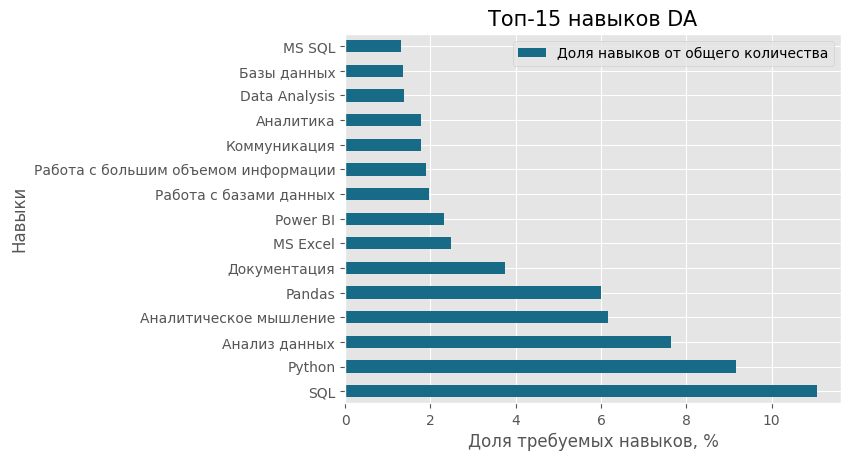

In [164]:
plt.figure(figsize=(8,5))
df_skills_da_top.plot.barh('skill', 'part_skill', color='#176B87', label='Доля навыков от общего количества')
plt.title(label='Топ-15 навыков DA', fontsize=15)
plt.xlabel('Доля требуемых навыков, %', fontsize=12)
plt.ylabel('Навыки', fontsize=12);

Для DA наиболее востребованы hard skills - SQL, Python и Pandas, из soft skills наиболее востребованы - Анализ данных и Аналитическое мышление.
Теперь рассмотрим навыки DS.

In [165]:
df_skills_ds = top_skills(df_ds['key_skills'])
df_skills_ds.value_counts().head(15)

skills                   
Python                       476
Pandas                       407
SQL                          314
Документация                 239
Machine Learning             221
ML                            88
Коммуникация                  88
Математическая статистика     78
Data Science                  66
NLP                           53
Git                           52
confluence                    51
PyTorch                       51
Анализ данных                 49
Big Data                      47
Name: count, dtype: int64

In [166]:
df_skills_ds.nunique()

skills    457
dtype: int64

457 различных навыков DS. Найдём процентное соотношение для DS.

In [167]:
# найдё общее количество навыков
df_skills_ds.count()

skills    3825
dtype: int64

In [168]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_ds_top = df_skills_ds.value_counts().head(15).reset_index()
df_skills_ds_top['part'] = round((df_skills_ds_top['count'] / 3825) * 100, 2)
df_skills_ds_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_ds_top

,skill,cnt_skill,part_skill
0,Python,476,12.44
1,Pandas,407,10.64
2,SQL,314,8.21
3,Документация,239,6.25
4,Machine Learning,221,5.78
5,ML,88,2.30
6,Коммуникация,88,2.30
7,Математическая статистика,78,2.04
8,Data Science,66,1.73
9,NLP,53,1.39


Визуализируем наш топ навыков.

<Figure size 800x500 with 0 Axes>

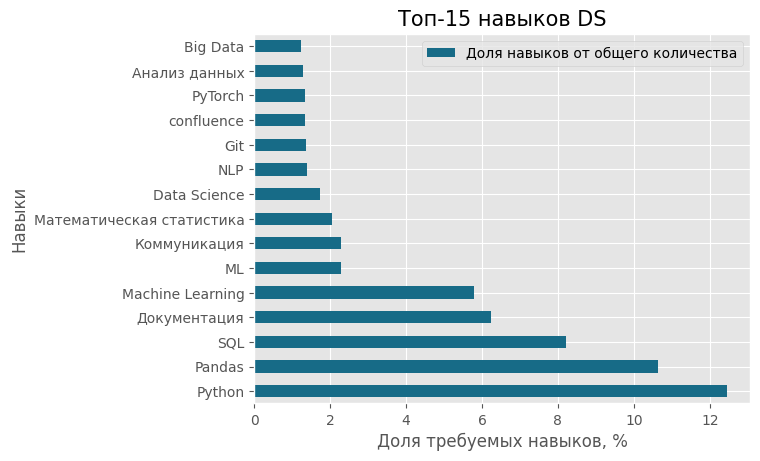

In [169]:
plt.figure(figsize=(8,5))
df_skills_ds_top.plot.barh('skill', 'part_skill', color='#176B87', label='Доля навыков от общего количества')
plt.title(label='Топ-15 навыков DS', fontsize=15)
plt.xlabel('Доля требуемых навыков, %', fontsize=12)
plt.ylabel('Навыки', fontsize=12);

**Выводы:**<br>
В топ DA входит:<br>
- самые востребованные: SQL, Python, Анализ данных, Аналитическое мышление, Pandas
- средние: Документация, MS Excel, Power BI, Работа с базами данных, Работа с большим объемом информации<br>
Для DA наиболее востребованы hard skills - SQL, Python и Pandas, из soft skills наиболее востребованы - Анализ данных и Аналитическое мышление.

В топ DS входит:<br>
- самые востребованные: Python, Pandas, SQL, Документация, Machine Learning
- средние: ML, Коммуникация, Математическая статистика, Data Science, NLP<br>
Для DS ещё более востребованы hard skills - Python, Pandas, SQL и Machine Learning, из soft skills наиболее востребованы - Документация.

#### Топ требуемых навыков для DA в зависимости от опыта


Посмотрим на требуемые навыки для Junior (no experince).

In [170]:
df_skills_da_jun1 = top_skills(df_da_jun1['key_skills'])
df_skills_da_jun1.value_counts().head(10)

skills                             
Аналитическое мышление                 62
SQL                                    59
Анализ данных                          56
Python                                 55
MS Excel                               54
Работа с большим объемом информации    17
Pandas                                 15
Коммуникация                           15
Документация                           15
Базы данных                            12
Name: count, dtype: int64

In [171]:
# найдё общее количество навыков
df_skills_da_jun1.count()

skills    606
dtype: int64

In [172]:
df_skills_da_jun1.nunique()

skills    167
dtype: int64

167 различных требований.

In [173]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_da_jun1_top = df_skills_da_jun1.value_counts().head(10).reset_index()
df_skills_da_jun1_top['part'] = round((df_skills_da_jun1_top['count'] / 606) * 100, 2)
df_skills_da_jun1_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_da_jun1_top

,skill,cnt_skill,part_skill
0,Аналитическое мышление,62,10.23
1,SQL,59,9.74
2,Анализ данных,56,9.24
3,Python,55,9.08
4,MS Excel,54,8.91
5,Работа с большим объемом информации,17,2.81
6,Pandas,15,2.48
7,Коммуникация,15,2.48
8,Документация,15,2.48
9,Базы данных,12,1.98


Наиболее востребованные навыки для Junior это soft skills - Аналитическое мышление, Анализ данных. Из hard skills востребованы - SQL, Python и MS Excel.

Посмотрим на требуемые навыки для Junior+ (1-3 years).

In [174]:
df_skills_da_jun2 = top_skills(df_da_jun2['key_skills'])
df_skills_da_jun2.value_counts().head(10)

skills                             
SQL                                    529
Python                                 407
Анализ данных                          371
Аналитическое мышление                 356
Pandas                                 289
MS Excel                               114
Power BI                               114
Документация                           111
Работа с базами данных                 105
Работа с большим объемом информации     99
Name: count, dtype: int64

In [175]:
# найдё общее количество навыков
df_skills_da_jun2.count()

skills    4705
dtype: int64

In [176]:
df_skills_da_jun2.nunique()

skills    590
dtype: int64

590 различных требований.

In [177]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_da_jun2_top = df_skills_da_jun2.value_counts().head(10).reset_index()
df_skills_da_jun2_top['part'] = round((df_skills_da_jun2_top['count'] / 4705) * 100, 2)
df_skills_da_jun2_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_da_jun2_top

,skill,cnt_skill,part_skill
0,SQL,529,11.24
1,Python,407,8.65
2,Анализ данных,371,7.89
3,Аналитическое мышление,356,7.57
4,Pandas,289,6.14
5,MS Excel,114,2.42
6,Power BI,114,2.42
7,Документация,111,2.36
8,Работа с базами данных,105,2.23
9,Работа с большим объемом информации,99,2.10


Наиболее востребованные навыки для Junior+ (1-3 years) - SQL, Python, Анализ данных, Аналитическое мышление и Pandas.

Посмотрим на требуемые навыки для Middle (3-6 years).

In [178]:
df_skills_da_mid = top_skills(df_da_mid['key_skills'])
df_skills_da_mid.value_counts().head(10)

skills                
SQL                       280
Python                    256
Анализ данных             176
Документация              168
Pandas                    167
Аналитическое мышление     67
Power BI                   59
Data Analysis              48
Коммуникация               45
Работа с базами данных     40
Name: count, dtype: int64

In [179]:
# найдё общее количество навыков
df_skills_da_mid.count()

skills    2515
dtype: int64

In [180]:
df_skills_da_mid.nunique()

skills    372
dtype: int64

372 различных требований.

In [181]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_da_mid_top = df_skills_da_mid.value_counts().head(10).reset_index()
df_skills_da_mid_top['part'] = round((df_skills_da_mid_top['count'] / 2515) * 100, 2)
df_skills_da_mid_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_da_mid_top

,skill,cnt_skill,part_skill
0,SQL,280,11.13
1,Python,256,10.18
2,Анализ данных,176,7.00
3,Документация,168,6.68
4,Pandas,167,6.64
5,Аналитическое мышление,67,2.66
6,Power BI,59,2.35
7,Data Analysis,48,1.91
8,Коммуникация,45,1.79
9,Работа с базами данных,40,1.59


Наиболее востребованные навыки для Middle (3-6 years) - SQL, Python, Анализ данных, Документация и Pandas.

Посмотрим на требуемые навыки для Senior (6+ years).

In [182]:
df_skills_da_sen = top_skills(df_da_sen['key_skills'])
df_skills_da_sen.value_counts().head(10)

skills                    
SQL                           7
Python                        7
Power BI                      4
Проактивность                 4
Pandas                        3
Аналитическое мышление        2
Аналитические исследования    2
Документация                  2
confluence                    2
Tableau                       2
Name: count, dtype: int64

In [183]:
# найдё общее количество навыков
df_skills_da_sen.count()

skills    78
dtype: int64

In [184]:
df_skills_da_sen.nunique()

skills    47
dtype: int64

590 различных требований.

In [185]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_da_sen_top = df_skills_da_sen.value_counts().head(10).reset_index()
df_skills_da_sen_top['part'] = round((df_skills_da_sen_top['count'] / 78) * 100, 2)
df_skills_da_sen_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_da_sen_top

,skill,cnt_skill,part_skill
0,SQL,7,8.97
1,Python,7,8.97
2,Power BI,4,5.13
3,Проактивность,4,5.13
4,Pandas,3,3.85
5,Аналитическое мышление,2,2.56
6,Аналитические исследования,2,2.56
7,Документация,2,2.56
8,confluence,2,2.56
9,Tableau,2,2.56


Наиболее востребованные навыки для Senior (6+ years) - SQL, Python, Power BI, Проактивность и Pandas.

Чаще всего требования к специалистам DA в зависимости от требуемого опыта следующие:
- Junior (no experince) - Аналитическое мышление, SQL, Анализ данных, Python и MS Excel. Из 167 различных требований
- Junior+ (1-3 years) - SQL, Python, Анализ данных, Аналитическое мышление и Pandas. Из 590 различных требований
- Middle (3-6 years) - SQL, Python, Анализ данных, Документация и Pandas. Из 347 различных требований
- Senior (6+ years) - SQL, Python, Power BI, Проактивность и Pandas. Из 47 различных требований

Больше всего требований к категории Junior+.<br>
Новичкам не обязательно в совершенствве знать SQL и Python в отличии от остальных категорий, для Junior больше важны soft skills. Для остальных категорий в первую очередь необходимы hard skills. У Junior+ и Middle разница очень размыта, Middle должен уметь работать с документацией. Senior кроме всего должен уметь работать с визуализацией.

#### Топ требуемых навыков для DS в зависимости от опыта

Сделаем то же самое для DS.

Посмотрим на требуемые навыки для Junior (no experince).

In [186]:
df_skills_ds_jun1 = top_skills(df_ds_jun1['key_skills'])
df_skills_ds_jun1.value_counts().head(10)

skills                   
Python                       31
Математическая статистика    23
Data Mining                  21
Pandas                       20
Git                          20
Machine Learning              5
Машинное обучение             5
Документация                  4
ML                            4
Анализ данных                 3
Name: count, dtype: int64

In [187]:
# найдё общее количество навыков
df_skills_ds_jun1.count()

skills    196
dtype: int64

In [188]:
df_skills_ds_jun1.nunique()

skills    55
dtype: int64

55 различных требований.

In [189]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_ds_jun1_top = df_skills_ds_jun1.value_counts().head(10).reset_index()
df_skills_ds_jun1_top['part'] = round((df_skills_ds_jun1_top['count'] / 196) * 100, 2)
df_skills_ds_jun1_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_ds_jun1_top

,skill,cnt_skill,part_skill
0,Python,31,15.82
1,Математическая статистика,23,11.73
2,Data Mining,21,10.71
3,Pandas,20,10.20
4,Git,20,10.20
5,Machine Learning,5,2.55
6,Машинное обучение,5,2.55
7,Документация,4,2.04
8,ML,4,2.04
9,Анализ данных,3,1.53


Наиболее востребованные навыки для Junior (no experince) - Python, Математическая статистика, Data Mining, Pandas и Git.

Посмотрим на требуемые навыки для Junior+ (1-3 years).

In [190]:
df_skills_ds_jun2 = top_skills(df_ds_jun2['key_skills'])
df_skills_ds_jun2.value_counts().head(10)

skills                   
Python                       202
Pandas                       195
SQL                          157
Machine Learning             101
Документация                  94
Коммуникация                  37
Математическая статистика     32
ML                            28
Big Data                      28
Data Science                  26
Name: count, dtype: int64

In [191]:
# найдё общее количество навыков
df_skills_ds_jun2.count()

skills    1587
dtype: int64

In [192]:
df_skills_ds_jun2.nunique()

skills    237
dtype: int64

590 различных требований.

In [193]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_ds_jun2_top = df_skills_ds_jun2.value_counts().head(10).reset_index()
df_skills_ds_jun2_top['part'] = round((df_skills_ds_jun2_top['count'] / 1587) * 100, 2)
df_skills_ds_jun2_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_ds_jun2_top

,skill,cnt_skill,part_skill
0,Python,202,12.73
1,Pandas,195,12.29
2,SQL,157,9.89
3,Machine Learning,101,6.36
4,Документация,94,5.92
5,Коммуникация,37,2.33
6,Математическая статистика,32,2.02
7,ML,28,1.76
8,Big Data,28,1.76
9,Data Science,26,1.64


Наиболее востребованные навыки для Junior+ (1-3 years) - Python, Pandas, SQL, Machine Learning и Документация.

Посмотрим на требуемые навыки для Middle (3-6 years).

In [194]:
df_skills_ds_mid = top_skills(df_ds_mid['key_skills'])
df_skills_ds_mid.value_counts().head(10)

skills          
Python              228
Pandas              182
SQL                 150
Документация        131
Machine Learning    108
ML                   51
Коммуникация         47
Data Science         32
confluence           29
NLP                  29
Name: count, dtype: int64

In [195]:
# найдё общее количество навыков
df_skills_ds_mid.count()

skills    1886
dtype: int64

In [196]:
df_skills_ds_mid.nunique()

skills    316
dtype: int64

590 различных требований.

In [197]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_ds_mid_top = df_skills_ds_mid.value_counts().head(10).reset_index()
df_skills_ds_mid_top['part'] = round((df_skills_ds_mid_top['count'] / 1886) * 100, 2)
df_skills_ds_mid_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_ds_mid_top

,skill,cnt_skill,part_skill
0,Python,228,12.09
1,Pandas,182,9.65
2,SQL,150,7.95
3,Документация,131,6.95
4,Machine Learning,108,5.73
5,ML,51,2.70
6,Коммуникация,47,2.49
7,Data Science,32,1.70
8,confluence,29,1.54
9,NLP,29,1.54


Наиболее востребованные навыки для Middle (3-6 years) - Python, Pandas, SQL, Документация и Machine Learning.

Посмотрим на требуемые навыки для Senior (6+ years).

In [198]:
df_skills_ds_sen = top_skills(df_ds_sen['key_skills'])
df_skills_ds_sen.value_counts().head(10)

skills             
Python                 15
Документация           10
Pandas                 10
Data Science            7
Machine Learning        7
ML                      5
PyTorch                 4
SQL                     4
Управление командой     3
Коммуникация            3
Name: count, dtype: int64

In [199]:
# найдё общее количество навыков
df_skills_ds_sen.count()

skills    156
dtype: int64

In [200]:
df_skills_da_sen.nunique()

skills    47
dtype: int64

590 различных требований.

In [201]:
# создадим столбец с долей требуемого навыка в процентах 
df_skills_ds_sen_top = df_skills_ds_sen.value_counts().head(10).reset_index()
df_skills_ds_sen_top['part'] = round((df_skills_ds_sen_top['count'] / 156) * 100, 2)
df_skills_ds_sen_top.columns = ['skill', 'cnt_skill', 'part_skill']
df_skills_ds_sen_top

,skill,cnt_skill,part_skill
0,Python,15,9.62
1,Документация,10,6.41
2,Pandas,10,6.41
3,Data Science,7,4.49
4,Machine Learning,7,4.49
5,ML,5,3.21
6,PyTorch,4,2.56
7,SQL,4,2.56
8,Управление командой,3,1.92
9,Коммуникация,3,1.92


Наиболее востребованные навыки для Senior (6+ years) - Python, Документация, Pandas, Data Science и Machine Learning.

Требования к специалистам DS в зависимости от требуемого опыта следующие:<br>
- Junior (no experince) - Python, Математическая статистика, Data Mining, Pandas и Git. ИЗ 55 различных требований
- Junior+ (1-3 years) - Python, Pandas, SQL, Machine Learning и Документация. Из 237 различных требований
- Middle (3-6 years) - Python, Pandas, SQL, Документация и Machine Learning. Из 316 различных требований
- Senior (6+ years) - Python, Документация, Pandas, Data Science и Machine Learning. Из 47 различных требований

Больше всего требований к Middle.<br>
Абсолютно для всех категорий в первую очередь обязательно нужно владеть hard skills - Python и Pandas. Новичкам нужно знать Математическую статистику. У Junior+ и Middle разницы нет. Senior кроме всего должен обладать навыками Data Science.

### Топ по количеству вакансий

Ранее мы определили, что у DA из 1381 вакансии больше всех требуется Junior+ - 60 % всезх вакансий, далее в 2 раза меньше Middle - 30 %, затем Junior - 8 % и Senior - менее 1 %.<br>
А у DS из 756 вакансий почти на одном уровне требуются Middle - 47 % и Junior+ - 43 %, вакансий Junior и Senior значительно меньше - 5 % и 3 %<br>
А также узнали топ организаций по общему количеству вакансий DA и DS. Теперь разобъём по категориям опыта и определим для каждой категории своих лидеров..

In [202]:
df_da_jun1['id'].count()

119

In [203]:
df_da_jun1['employer'].value_counts().head(10)

employer
сбер                                     12
магнит, розничная сеть                    5
юникон ап                                 3
московская биржа                          2
нао ирмаст-холдинг                        2
согласие, страховая компания              2
ozon                                      2
центральный банк российской федерации     2
сибур, группа компаний                    2
dns технологии                            2
Name: count, dtype: int64

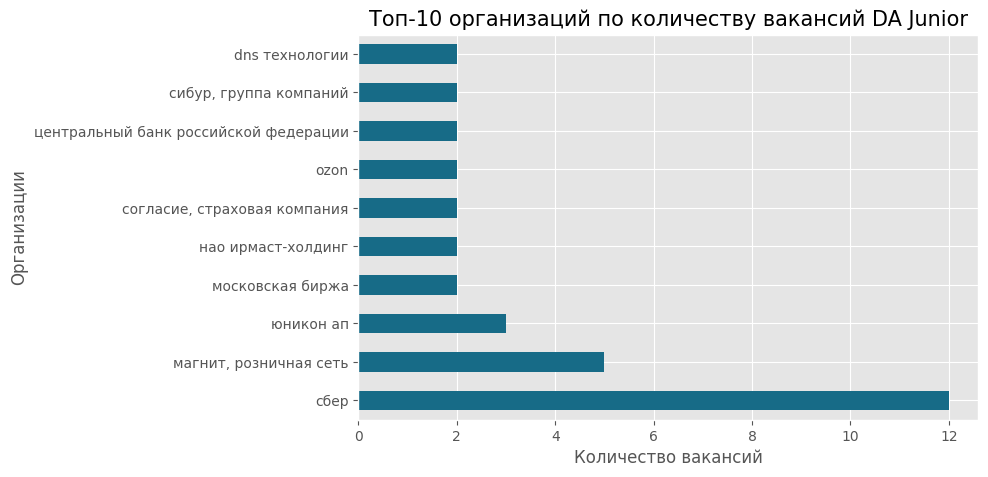

In [204]:
plt.figure(figsize=(8,5))
df_da_jun1['employer'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DA Junior', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Из 119 вакансий DA Junior 12 в Сбер, 5 Магнит, 3 Юникон. По 2 вакансии в Московской бирже, НАО Ирмаст-холдинг, Согласие, Ozon, ЦБ РФ, Сибур, DNS. 

In [205]:
df_da_jun2['id'].count()

830

In [206]:
df_da_jun2['employer'].value_counts().head(10)

employer
сбер                                     82
банк втб (пао)                           21
мтс                                      14
магнит, розничная сеть                   13
центральный банк российской федерации    11
марс                                     11
ozon                                     10
wildberries                               9
деловые линии                             9
okko                                      8
Name: count, dtype: int64

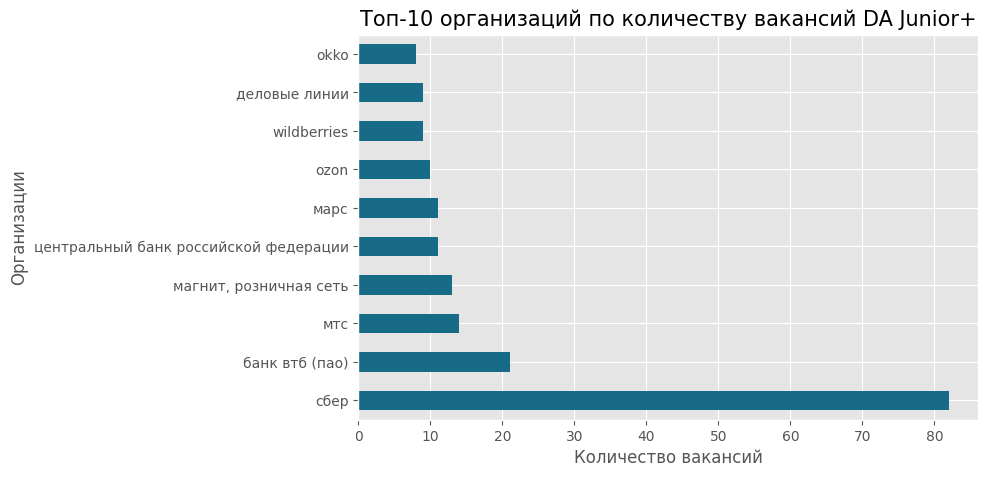

In [207]:
plt.figure(figsize=(8,5))
df_da_jun2['employer'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DA Junior+', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Из 830 вакансий DA Junior+ 82 в Сбер, 21 в ВТБ, 14 МТС, 13 Магнит, по 11 в ЦБ РФ и Марс. В топ-10 входят: Ozon, Wildberries, Деловые линии, Okko.

In [208]:
df_da_mid['id'].count()

422

In [209]:
df_da_mid['employer'].value_counts().head(10)

employer
сбер                    38
wildberries             16
т1                      11
ozon                    10
maxim technology         7
яндекс                   7
«uzum technologies».     6
контур                   6
мтс                      6
inguru.ru                6
Name: count, dtype: int64

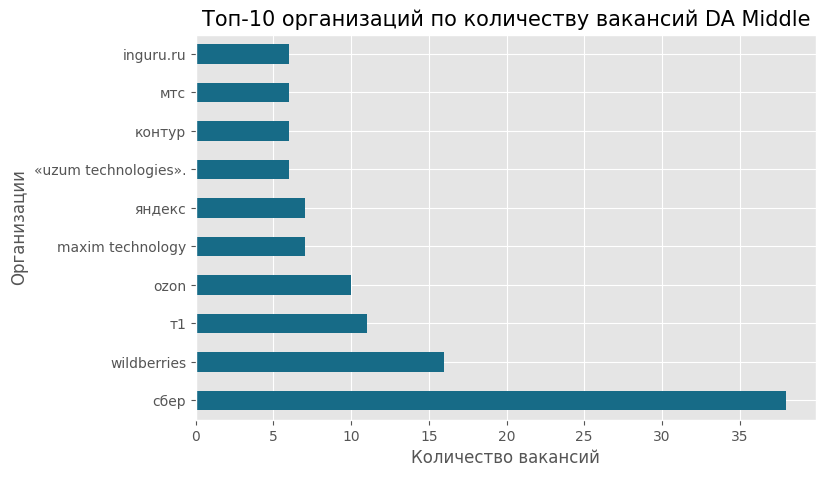

In [210]:
plt.figure(figsize=(8,5))
df_da_mid['employer'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DA Middle', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Из 422 вакансий DA Middle 38 в Сбер, 16 в Wildberries, 11 в T1, 10 в Ozon. В топ-10 входят: Maxim Technology, Яндекс, Uzum Technologies, Контур, МТС, Inguru.ru

In [211]:
df_da_sen['id'].count()

10

In [212]:
df_da_sen['employer'].value_counts()

employer
леруа мерлен          2
cloudpayments         1
reinvent baltics      1
секонд сайт           1
aramco innovations    1
paymatrix             1
spice agency          1
мединвестгрупп        1
b2broker              1
Name: count, dtype: int64

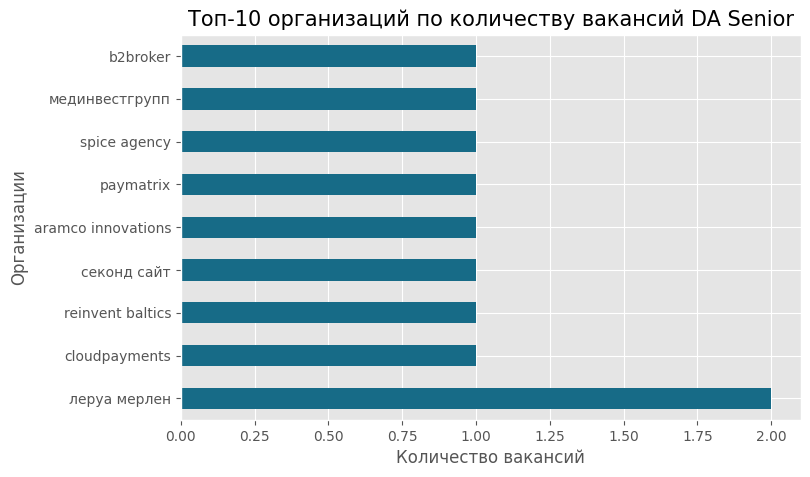

In [213]:
plt.figure(figsize=(8,5))
df_da_sen['employer'].value_counts().plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DA Senior', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Из 10 вакансий DA Senior 2 в Леруа Мерлен и по 1 в cloudpayments, reinvent baltics, секонд сайт, aramco innovations, paymatrix, spice agency, мединвестгрупп и b2broker.

Теперь посмотрим как распределены лидеры вакансий DS.

In [214]:
df_ds_jun1['id'].count()

39

In [215]:
df_ds_jun1['employer'].value_counts().head(10)

employer
сбер                                                        9
молвер                                                      5
ozon                                                        4
lamoda tech                                                 2
адв                                                         1
фгбун институт психологии российской академии наук          1
тестовая компания песочница для разработчиков по диасофт    1
bnd llc                                                     1
blockshop                                                   1
мигкредит                                                   1
Name: count, dtype: int64

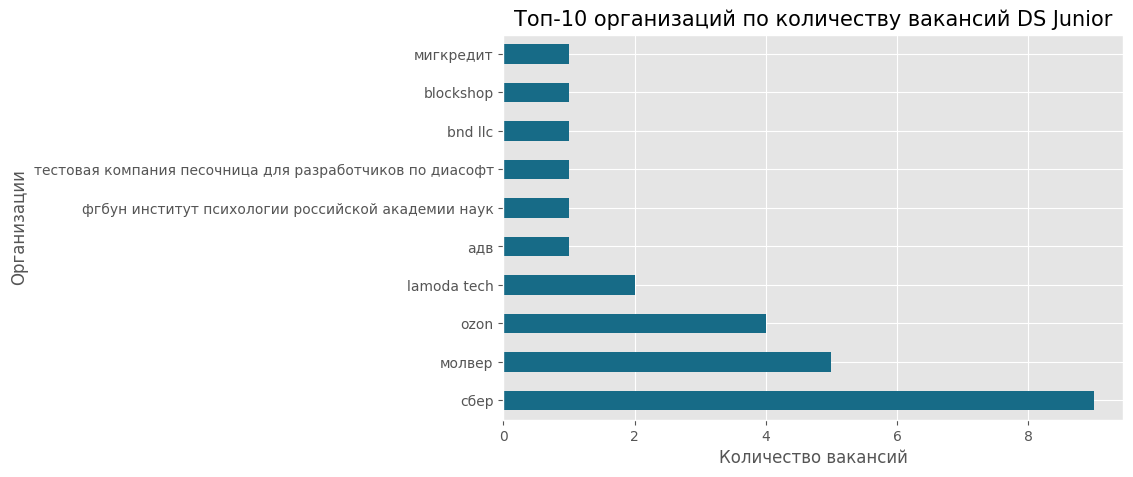

In [216]:
plt.figure(figsize=(8,5))
df_ds_jun1['employer'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DS Junior', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Из 39 вакансий DS Junior 9 в Сбер, 5 в Молвер, 4 в Ozon. Остальные организации разместили по одной вакансии: Lamoda Tech, АДВ, институт психологии РАН и т.д.

In [217]:
df_ds_jun2['id'].count()

330

In [218]:
df_ds_jun2['employer'].value_counts().head(10)

employer
сбер                             56
банк втб (пао)                   11
газпромбанк                       8
ростелеком                        7
сахалин - остров возможностей     7
1221системс                       7
билайн                            7
lamoda tech                       6
пкб                               6
samokat.tech                      6
Name: count, dtype: int64

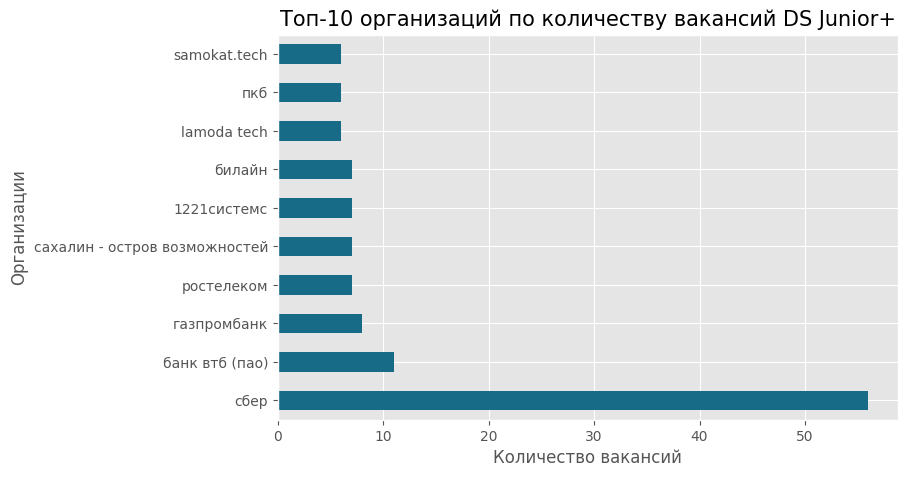

In [219]:
plt.figure(figsize=(8,5))
df_ds_jun2['employer'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DS Junior+', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Из 330 вакансий DS Junior+ 56 в Сбер, 11 в ВТБ, 8 в Газпромбанк. В топ-10 входят: Ростелеком, Сахалин-остров возможностей, 1221 систем, Билайн, Lamoda Tech, ПКБ, Samokat.tech.

In [220]:
df_ds_mid['id'].count()

359

In [221]:
df_ds_mid['employer'].value_counts().head(10)

employer
сбер               54
ozon               18
газпромбанк        16
samokat.tech       12
wildberries         8
т1                  7
райффайзен банк     6
headhunter          5
дом.рф              5
банк втб (пао)      5
Name: count, dtype: int64

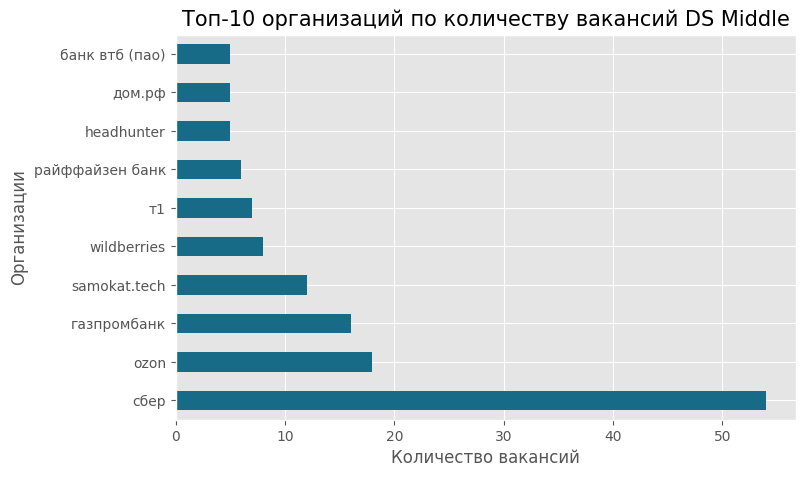

In [222]:
plt.figure(figsize=(8,5))
df_ds_mid['employer'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DS Middle', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Из 359 вакансий DS Middle 54 в Сбер, 18 в Ozon, 16 в Газпромбанк, 12 в Samokat.tech. В топ-10 входят: Wildberries, T1, Райффайзен банк, Headhunter, Дом.рф, ВТБ.

In [223]:
df_ds_sen['id'].count()

28

In [224]:
df_ds_sen['employer'].value_counts().head(10)

employer
sape                  2
гудфокаст             2
aramco innovations    2
биайэй-технолоджиз    2
элемент лизинг        1
rubbles               1
альфа-банк            1
selecty               1
мокка                 1
консалтика            1
Name: count, dtype: int64

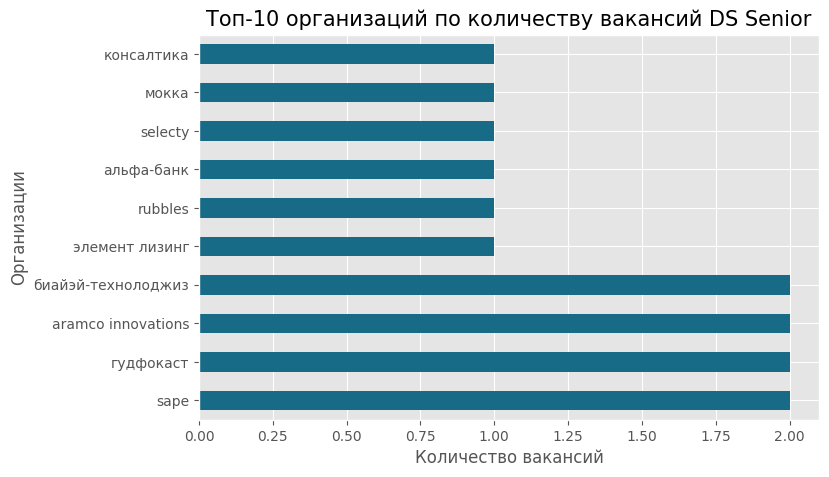

In [225]:
plt.figure(figsize=(8,5))
df_ds_sen['employer'].value_counts().head(10).plot.barh(color='#176B87')
plt.title('Топ-10 организаций по количеству вакансий DS Senior', fontsize=15)
plt.xlabel('Количество вакансий', fontsize=12)
plt.ylabel('Организации', fontsize=12);

Из 28 вакансий DS Senior по 2 в Sape, Гудфокаст, Aramco innovations, Биайэй-Технолоджиз. В остальных организациях требуется по 1 специалисту: "э"лемент лизинг, Rubbles, Альфа-банк и т. д.

**Выводы:**<br>
Из 119 вакансий DA Junior 12 в Сбер, 5 Магнит, 3 Юникон. По 2 вакансии в Московской бирже, НАО Ирмаст-холдинг, Согласие, Ozon, ЦБ РФ, Сибур, DNS.<br>
Из 830 вакансий DA Junior+ 82 в Сбер, 21 в ВТБ, 14 МТС, 13 Магнит, по 11 в ЦБ РФ и Марс. В топ-10 входят: Ozon, Wildberries, Деловые линии, Okko.<br>
Из 422 вакансий DA Middle 38 в Сбер, 16 в Wildberries, 11 в T1, 10 в Ozon. В топ-10 входят: Maxim Technology, Яндекс, Uzum Technologies, Контур, МТС, Inguru.ru.<br>
Из 10 вакансий DA Senior 2 в Леруа Мерлен и по 1 в cloudpayments, reinvent baltics, секонд сайт, aramco innovations, paymatrix, spice agency, мединвестгрупп и b2broker.<br>

Из 39 вакансий DS Junior 9 в Сбер, 5 в Молвер, 4 в Ozon. Остальные организации разместили по одной вакансии: Lamoda Tech, АДВ, институт психологии РАН и т.д.<br>
Из 330 вакансий DS Junior+ 56 в Сбер, 11 в ВТБ, 8 в Газпромбанк. В топ-10 входят: Ростелеком, Сахалин-остров возможностей, 1221 систем, Билайн, Lamoda Tech, ПКБ, Samokat.tech.<br>
Из 359 вакансий DS Middle 54 в Сбер, 18 в Ozon, 16 в Газпромбанк, 12 в Samokat.tech. В топ-10 входят: Wildberries, T1, Райффайзен банк, Headhunter, Дом.рф, ВТБ.<br>
Из 28 вакансий DS Senior по 2 в Sape, Гудфокаст, Aramco innovations, Биайэй-Технолоджиз. В остальных организациях требуется по 1 специалисту: "э"лемент лизинг, Rubbles, Альфа-банк и т. д.<br>

Самые востребованные категории Junior+ и Middle. Абсолютный лидер по всем категориям вакансий Сбер, за исключением категории Senior. В топ-10 в основном входят крупные банки: Сбер, ВТБ, Газпромбанк, ЦБ РФ, Райффайзен банк; крупные интернет-магазины: Ozon, Wildberries, Lamoda Tech, Samokat.tech; компании предоставляющие услуги связи: МТС, Билайн, Ростелеком; IT-компании: Т1, Яндекс.

### Зарплаты в зависимости от категории опыта

Посмотрим на предлагаемы зарплаты для DA. Обновим 

In [226]:
df_da_jun1['salary_from'].unique()

array([ 60000,  56000,  55000,  25000,  30000,  99500,  45000,  80000,
        85000,  78000,  70000,  78045,  40000,  42500, 100000,  50000,
        63000,  61000,  75000,  90000,  26000,     50,  76000, 112200,
       140000])

Обнаружено аномальное значение 50, которое подлежит замене на 50000.

In [227]:
df_da.loc[(df_da['salary_from'] == 50) & (df_da['experience'] == 'Junior (no experince)'), 'salary_from'] = 50000
df_da_jun1 = df_da.query('experience == "Junior (no experince)"')

In [228]:
df_da_salaty_from = df_da.pivot_table(index='experience', values='salary_from', aggfunc=['min', 'max', 'median']).reset_index()
df_da_salaty_from.columns = ['experience', 'min', 'max', 'median']
df_da_salaty_from

,experience,min,max,median
0,Junior (no experince),25000,140000,60000
1,Junior+ (1-3 years),28940,300000,90000
2,Middle (3-6 years),40000,350000,150000
3,Senior (6+ years),70000,200000,200000


Наглядно представлены разброс зарплат и медианное значение для каждой категории DA.

In [229]:
df_ds_salaty_from = df_ds.pivot_table(index='experience', values='salary_from', aggfunc=['min', 'max', 'median']).reset_index()
df_ds_salaty_from.columns = ['experience', 'min', 'max', 'median']
df_ds_salaty_from

,experience,min,max,median
0,Junior (no experince),25000,140250,60000
1,Junior+ (1-3 years),50000,210000,105000
2,Middle (3-6 years),93500,350000,200000
3,Senior (6+ years),160000,250000,250000


Наглядно представлены разброс зарплат и медианное значение для каждой категории DS.

Мы определили нижнюю границу зарплаты для специалистов DA и DS каждого из уровней.<br>
Создадим удобный датафрейм для наглядности.

In [230]:
data = {'da_min': [60000, 90000, 150000, 200000], 'ds_min': [60000, 105000, 200000, 250000]}
df_salary_from = pd.DataFrame(data, index=['Junior', 'Junior+', 'Middle', 'Senior'])

Визуализируем получившиеся данные.

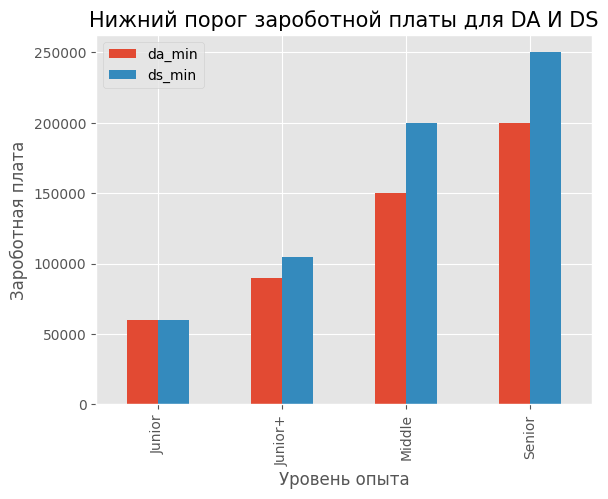

In [231]:
df_salary_from.plot.bar()
plt.title('Нижний порог зароботной платы для DA И DS', fontsize=15)
plt.xlabel('Уровень опыта', fontsize=12)
plt.ylabel('Зароботная плата', fontsize=12);

Теперь мы видим, что специалистам без опыта предлагают одинаковый уровень зарплаты, а далее у DS зарплата выше чем у DA. Самая заметная разница у Middle - 25%, Senior - 20%, Junior+ - около 10%.

Повторим процедуру для верхней границы. Рассмотрим DA.

In [232]:
df_da_salaty_to = df_da.pivot_table(index='experience', values='salary_to', aggfunc=['min', 'max', 'median']).reset_index()
df_da_salaty_to.columns = ['experience', 'min', 'max', 'median']
df_da_salaty_to

,experience,min,max,median
0,Junior (no experince),25000,142000,80000
1,Junior+ (1-3 years),35000,300000,120000
2,Middle (3-6 years),55000,495550,200000
3,Senior (6+ years),200000,280000,240000


Наглядно представлены разброс зарплат и медианное значение для каждой категории DA.

In [233]:
df_ds_salaty_to = df_ds.pivot_table(index='experience', values='salary_to', aggfunc=['min', 'max', 'median']).reset_index()
df_ds_salaty_to.columns = ['experience', 'min', 'max', 'median']
df_ds_salaty_to

,experience,min,max,median
0,Junior (no experince),25000,124752,80000
1,Junior+ (1-3 years),30000,350000,200000
2,Middle (3-6 years),140250,500000,300000
3,Senior (6+ years),190000,550000,350000


Наглядно представлены разброс зарплат и медианное значение для каждой категории DS.

Создадим удобный датафрейм.

In [234]:
data = {'DA': [80000, 120000, 200000, 240000], 'DS': [80000, 200000, 300000, 350000]}
df_salary_from = pd.DataFrame(data, index=['Junior', 'Junior+', 'Middle', 'Senior'])

Визуализируем получившиеся данные.

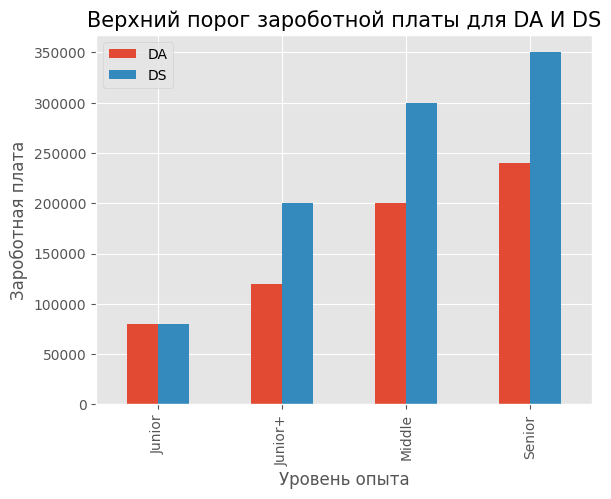

In [235]:
df_salary_from.plot.bar()
plt.title('Верхний порог зароботной платы для DA И DS', fontsize=15)
plt.xlabel('Уровень опыта', fontsize=12)
plt.ylabel('Зароботная плата', fontsize=12);

Мы видим, что специалистам без опыта также предлагают одинаковый уровень зарплаты, а далее у DS зарплата выше чем у DA, причем разница существеннее, чем у нижнего порога. Самая заметная разница у Junior+ - около 40%, Middle - 34%, Senior - 31%, .

**Выводы:**<br>
Видны чёткие ступени по предлагаемой зарплате в зависимости от опыта. Общая тенденция такова, что для DS зарплатная вилка больше на 10 - 40 % в зависимости от опыта, чем для DA, за исключением категории Junior - здесь паритет. Выглядит это всё следующим образом:<br>
Зарплатная вилка DA:
- Junior - 60-80
- Junior+ - 90-120
- Middle - 150-200
- Senior - 200-240

Зарплатная вилка DS:
- Junior - 60-80
- Junior+ - 105-200
- Middle - 200-300
- Senior - 250-350


### Тип занятости в зависимости от категории опыта

Исследуем DA.

In [236]:
# создаё сводную таблицу
df_da_employment = df_da.pivot_table(index='experience', columns='employment', values='id', aggfunc='count')\
                    .reset_index().fillna (0)
df_da_employment.columns = ['experience', 'Полная занятость', 'Проектная работа', 'Стажировка', 'Частичная занятость']
# изменим тип данных на int
df_da_employment['Полная занятость'] = df_da_employment['Полная занятость'].astype(int)
df_da_employment['Проектная работа'] = df_da_employment['Проектная работа'].astype(int)
df_da_employment['Стажировка'] = df_da_employment['Стажировка'].astype(int)
df_da_employment['Частичная занятость'] = df_da_employment['Частичная занятость'].astype(int)
df_da_employment

,experience,Полная занятость,Проектная работа,Стажировка,Частичная занятость
0,Junior (no experince),102,1,13,3
1,Junior+ (1-3 years),822,2,1,5
2,Middle (3-6 years),416,1,0,5
3,Senior (6+ years),10,0,0,0


Подавляющее большинство вакансий с Полной занятостью. Редкие предложения для Проектной работы, Стажировок и Частичной занятости. У DA Senior кроме Полной занятости, других типов не бывает. Стажировки предлагают только Junior и Junior+.

Теперь исследуем DS.

In [237]:
# создаё сводную таблицу
df_ds_employment = df_ds.pivot_table(index='experience', columns='employment', values='id', aggfunc='count')\
                    .reset_index().fillna (0)
df_ds_employment.columns = ['experience', 'Полная занятость', 'Проектная работа', 'Стажировка', 'Частичная занятость']
# изменим тип данных на int
df_ds_employment['Полная занятость'] = df_ds_employment['Полная занятость'].astype(int)
df_ds_employment['Проектная работа'] = df_ds_employment['Проектная работа'].astype(int)
df_ds_employment['Стажировка'] = df_ds_employment['Стажировка'].astype(int)
df_ds_employment['Частичная занятость'] = df_ds_employment['Частичная занятость'].astype(int)
df_ds_employment

,experience,Полная занятость,Проектная работа,Стажировка,Частичная занятость
0,Junior (no experince),23,1,15,0
1,Junior+ (1-3 years),319,2,2,7
2,Middle (3-6 years),356,2,0,1
3,Senior (6+ years),28,0,0,0


Такая же картина наблюдается у DS, за небольшим исключением. У Junior нет частичной занятости.

### График работы в зависимости от категории опыта

Исследуем DA.

In [238]:
# создаё сводную таблицу
df_da_schedule = df_da.pivot_table(index='experience', columns='schedule', values='id', aggfunc='count')\
                    .reset_index().fillna (0)
df_da_schedule.columns = ['experience', 'Гибкий график', 'Полный день', 'Сменный график', 'Удаленная работа']
# изменим тип данных на int
df_da_schedule['Гибкий график'] = df_da_schedule['Гибкий график'].astype(int)
df_da_schedule['Полный день'] = df_da_schedule['Полный день'].astype(int)
df_da_schedule['Сменный график'] = df_da_schedule['Сменный график'].astype(int)
df_da_schedule['Удаленная работа'] = df_da_schedule['Удаленная работа'].astype(int)
df_da_schedule

,experience,Гибкий график,Полный день,Сменный график,Удаленная работа
0,Junior (no experince),3,101,2,13
1,Junior+ (1-3 years),14,687,4,125
2,Middle (3-6 years),14,302,0,106
3,Senior (6+ years),0,7,0,3


Больше всего вакансий предлагают Полный день, далее Удаленная работа, несколько десятков Гибкий график и единицы Сменный график. Для Senior возможны только Полный день или Удаленная работа. А Сменный график предлагают только для Junior и Junior+.

Исследуем DS.

In [239]:
# создаё сводную таблицу
df_ds_schedule = df_ds.pivot_table(index='experience', columns='schedule', values='id', aggfunc='count')\
                    .reset_index().fillna (0)
df_ds_schedule.columns = ['experience', 'Гибкий график', 'Полный день', 'Сменный график', 'Удаленная работа']
# изменим тип данных на int
df_ds_schedule['Гибкий график'] = df_ds_schedule['Гибкий график'].astype(int)
df_ds_schedule['Полный день'] = df_ds_schedule['Полный день'].astype(int)
df_ds_schedule['Сменный график'] = df_ds_schedule['Сменный график'].astype(int)
df_ds_schedule['Удаленная работа'] = df_ds_schedule['Удаленная работа'].astype(int)
df_ds_schedule

,experience,Гибкий график,Полный день,Сменный график,Удаленная работа
0,Junior (no experince),7,23,0,9
1,Junior+ (1-3 years),13,236,1,80
2,Middle (3-6 years),16,267,1,75
3,Senior (6+ years),2,22,1,3


Больше всего вакансий предлагают Полный день, далее Удаленная работа, несколько десятков Гибкий график и единицы Сменный график. А вот для DS Senior на выбор любой вариант работы. Как и у всех категорий, за небольшим исключением. Сменный график невозможен только для Junior. 

### Динамика размещения вакансий в зависимости от категории опыта

Исследуем DA.

In [240]:
# создадим столбец с месяцем размещения вакансии
df_da['month'] = df_da['published_at'].dt.month
df_da.head()

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,month
0,100039284,junior аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100039284,dns головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000,80000,ЗП не указана,"SQL, Power BI, Python, СУБД",5
1,100039480,аналитик данных,2024-05-24,https://hh.ru/vacancy/100039480,комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,60000,80000,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",5
2,100042705,аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100042705,dns головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000,120000,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",5
3,100046788,ведущий аналитик данных,2024-05-24,https://hh.ru/vacancy/100046788,х5 group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,90000,120000,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...",5
4,100056244,аналитик данных,2024-05-24,https://hh.ru/vacancy/100056244,лукойл,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,150000,200000,ЗП не указана,NaN,5


In [241]:
# сгруппируем данные по категориям в зависимости от месяца размещения вакансий
df_da_dinam_vac = df_da.pivot_table(index='experience', columns='month', values='id', aggfunc='count') \
                    .fillna(0).astype(int)
df_da_dinam_vac.columns = ['fev', 'mar', 'apr', 'may', 'jun']
df_da_dinam_vac

,fev,mar,apr,may,jun
experience,,,,,
Junior (no experince),0,19,30,39,31
Junior+ (1-3 years),0,142,213,269,206
Middle (3-6 years),1,83,96,138,104
Senior (6+ years),0,0,3,5,2


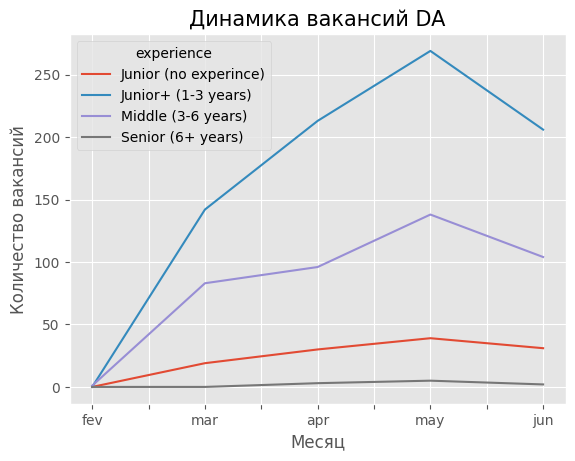

In [242]:
# построим линейный график
df_da_dinam_vac.T.plot()
plt.title('Динамика вакансий DA', fontsize=15)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12);

В феврале самое низкое количество вакансий, возможно из-за недостаточности данных, так как данные представлены с 13 февраля. Пиком для всех категорий DA является май. Возможно по той же причине - данные представлены по 11 июня.

Исследуем DS.

In [243]:
# создадим столбец с месяцем размещения вакансии
df_ds['month'] = df_ds['published_at'].dt.month
df_ds.head()

,id,name,published_at,alternate_url,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,month
0,100049339,стажер data science (новосибирск),2024-05-24,https://hh.ru/vacancy/100049339,сбер,Сбер для экспертов,Новосибирск,Junior (no experince),"['Python', 'Математическая статистика', 'Data ...",Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,60000,80000,ЗП не указана,NaN,5
1,100051447,data scientist,2024-05-24,https://hh.ru/vacancy/100051447,бюро кредитных историй скоринг бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,105000,200000,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",5
2,100070495,ml engineer / data scientist,2024-05-24,https://hh.ru/vacancy/100070495,гк фск,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,105000,200000,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",5
3,100076648,team lead data science,2024-05-24,https://hh.ru/vacancy/100076648,сбер,Сбер для экспертов,Москва,Middle (3-6 years),"['Python', 'Pandas', 'SQL', 'Machine Learning'...",Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,200000,300000,ЗП не указана,NaN,5
4,100077910,data analyst / data scientist,2024-06-08,https://hh.ru/vacancy/100077910,итсен,NaN,Москва,Middle (3-6 years),"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000,300000,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",6


In [244]:
# сгруппируем данные по категориям в зависимости от месяца размещения вакансий
df_ds_dinam_vac = df_ds.pivot_table(index='experience', columns='month', values='id', aggfunc='count') \
                    .fillna(0).astype(int)
df_ds_dinam_vac.columns = ['fev', 'mar', 'apr', 'may', 'jun']
df_ds_dinam_vac

,fev,mar,apr,may,jun
experience,,,,,
Junior (no experince),0,12,7,13,7
Junior+ (1-3 years),0,81,92,70,87
Middle (3-6 years),0,88,91,92,88
Senior (6+ years),1,5,11,6,5


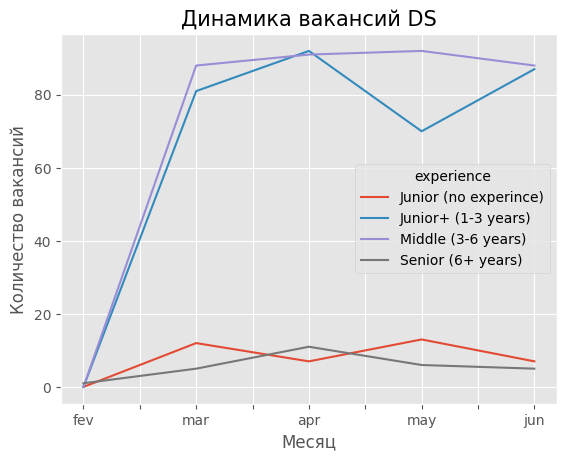

In [245]:
# построим линейный график
df_ds_dinam_vac.T.plot()
plt.title('Динамика вакансий DS', fontsize=15)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12);

В феврале 1 вакансия, так как февраль представлен одним днём. Для Middle и Junior+ с марта по июнь размещали стабильно около 80  вакансий. Чего не скажешь о Junior и Senior, количество размещаемых вакансий которых, также стабильно находились в пределах от 5 до 12.

**Выводы:**<br>
Проведено основное исследование вакансий Аналитиков данных и Data Scientist.<br>
1. Требуемые навыки.<br>
Из 814 всевозможных навыков в топ навыков DA входят:<br>
- наиболее востребованные: SQL, Python, Анализ данных, Аналитическое мышление, Pandas
- чуть менее востребованные: Документация, MS Excel, Power BI, Работа с базами данных, Работа с большим объемом информации<br>
Мы видим, что для DA наиболее востребованы hard skills - SQL, Python и Pandas, из soft skills наиболее востребованы - Анализ данных и Аналитическое мышление.<br>

Из 196 всевозможных навыков в топ навыков DS входят:<br>
- наиболее востребованные: Python, Pandas, SQL, Документация, Machine Learning
- чуть менее востребованные: ML, Коммуникация, Математическая статистика, Data Science, NLP<br>
Мы видим, что для DS ещё более востребованы hard skills - Python, Pandas, SQL и Machine Learning, из soft skills наиболее востребованы - Документация.<br>

Изучили требуемые навыки к специалистам DA и зависимости от требуемого опыта следующие:
- из 167 всевозможных навыков в вакансиях Junior (no experince), самые необходимые - Аналитическое мышление, SQL, Анализ данных, Python и MS Excel;
- из 590 всевозможных навыков в вакансиях Junior+ (1-3 years), самые необходимые - SQL, Python, Анализ данных, Аналитическое мышление и Pandas;
- из 347 всевозможных навыков в вакансиях Middle (3-6 years), самые необходимые - SQL, Python, Анализ данных, Документация и Pandas;
- из 47 всевозможных навыков в вакансиях Senior (6+ years), самые необходимые - SQL, Python, Power BI, Проактивность и Pandas.

В вакансиях Junior+ самое большое количество требуемых навыков.<br>
Junior не обязательно в совершенствве знать SQL и Python в отличии от остальных категорий, для Junior больше важны soft skills. Для остальных категорий в первую очередь необходимы hard skills. Между Junior+ и Middle разница в требуемых навыках почти одинаковая, Middle должен уметь работать с Документацией. Senior, кроме всего, должен уметь работать с визуализацией.

Изучили требуемые навыки к специалистам DS и в зависимости от требуемого опыта следующие:<br>
- из 55 всевозможных навыков в вакансиях Junior (no experince), самые необходимые - Python, Математическая статистика, Data Mining, Pandas и Git;
- из 237 всевозможных навыков в вакансиях Junior+ (1-3 years), самые необходимые - Python, Pandas, SQL, Machine Learning и Документация;
- из 316 всевозможных навыков в вакансиях Middle (3-6 years), самые необходимые - Python, Pandas, SQL, Документация и Machine Learning;
- из 47 всевозможных навыков в вакансиях Senior (6+ years), самые необходимые - Python, Документация, Pandas, Data Science и Machine Learning. <br>

В вакансиях Middle самое большое количество требуемых навыков.<br>
Всем категориям необходимо владеть hard skills - Python и Pandas. Junior нужно знать Математическую статистику. Между Junior+ и Middle разница в требуемых навыках отсутствует. Senior кроме всего должен обладать навыками Data Science.<br>

2. Организации которые размещают вакансии DA и DS в зависимости от требуемого опыта.<br>
Из 119 вакансий DA Junior 12 - Сбер, 5 - Магнит, 3 - Юникон. По 2 вакансии в Московской бирже, НАО Ирмаст-холдинг, Согласие, Ozon, ЦБ РФ, Сибур, DNS.<br>
Из 830 вакансий DA Junior+ 82 - Сбер, 21 - ВТБ, 14 - МТС, 13 - Магнит, по 11 - ЦБ РФ и Марс. В топ-10 также входят: Ozon, Wildberries, Деловые линии, Okko.<br>
Из 422 вакансий DA Middle 38 - Сбер, 16 - Wildberries, 11 - T1, 10 - Ozon. В топ-10 также входят: Maxim Technology, Яндекс, Uzum Technologies, Контур, МТС, Inguru.ru.<br>
Из 10 вакансий DA Senior 2 - Леруа Мерлен и по 1 - cloudpayments, reinvent baltics, секонд сайт, aramco innovations, paymatrix, spice agency, мединвестгрупп и b2broker.<br>

Из 39 вакансий DS Junior 9 - Сбер, 5 - Молвер, 4 - Ozon. Остальные организации разместили по одной вакансии: Lamoda Tech, АДВ, институт психологии РАН и т.д.<br>
Из 330 вакансий DS Junior+ 56 - Сбер, 11 - ВТБ, 8 - Газпромбанк. В топ-10 также входят: Ростелеком, Сахалин-остров возможностей, 1221 систем, Билайн, Lamoda Tech, ПКБ, Samokat.tech.<br>
Из 359 вакансий DS Middle 54 - Сбер, 18 - Ozon, 16 - Газпромбанк, 12 - Samokat.tech. В топ-10 также входят: Wildberries, T1, Райффайзен банк, Headhunter, Дом.рф, ВТБ.<br>
Из 28 вакансий DS Senior по 2 - Sape, Гудфокаст, Aramco innovations, Биайэй-Технолоджиз. В остальных организациях требуется по 1 специалисту: "э"лемент лизинг, Rubbles, Альфа-банк и т. д.<br>

Самые востребованные категории Junior+ и Middle, что не удивительно - специалиств данных категорий являются основными рабочими "руками", а в нашем случае "головами". Абсолютный лидер по всем категориям вакансий и с больши отрывом - это Сбер, за исключением категории Senior. В топ-10 в основном входят крупные банки: Сбер, ВТБ, Газпромбанк, ЦБ РФ, Райффайзен банк; крупные интернет-магазины: Ozon, Wildberries, Lamoda Tech, Samokat.tech; компании предоставляющие услуги связи: МТС, Билайн, Ростелеком; IT-компании: Т1, Яндекс.<br>

3. Зарплатная вилка.<br>
Видны чёткие ступени по предлагаемой зарплате в зависимости от опыта. Общая тенденция такова, что для DS зарплатная вилка больше на 10 - 40 % в зависимости от опыта, чем для DA, за исключением категории Junior - здесь паритет. Предлагаемые зарплаты:<br>
Для DA:<br>
- Junior - 60-80
- Junior+ - 90-120
- Middle - 150-200
- Senior - 200-240

Для DS:<br>
- Junior - 60-80
- Junior+ - 105-200
- Middle - 200-300
- Senior - 250-350

4. Тип занятости.<br>
Подавляющее большинство вакансий с Полной занятостью. Есть редкие предложения для Проектной работы, Стажировок и Частичной занятости. Для DA Senior кроме Полной занятости, других типов не предлагают. Стажировки предлагают только для Junior и Junior+. Такая же картина наблюдается у DS, за небольшим исключением. Для Junior не предлагают Частичную занятость.<br>

5. График работы.<br>
Для DA больше всего вакансий предлагают Полный день - 1097, далее Удаленная работа - 247, несколько десятков Гибкий график - 31 и единицы Сменный график - 6. Для Senior возможны только Полный день или Удаленная работа. А Сменный график предлагают только для Junior и Junior+.<br>
Для DS больше всего вакансий предлагают Полный день - 548, далее Удаленная работа - 167, несколько десятков Гибкий график - 38 и единицы Сменный график - 3. А вот для DS Senior на выбор любой вариант работы. Как и у всех категорий, за небольшим исключением. Сменный график невозможен только для Junior.<br>

6. Динамика вакансий по месяцам.<br>
В феврале самое низкое количество вакансий DA, возможно из-за недостаточности данных, так как данные представлены с 13 февраля. Пиком для всех категорий DA является май. Возможно по той же причине в июне наблюдается просадка - данные представлены по 11 июня. По категориям также наблюдается, что больше всего вакансий размещают для Junior+, далее Middle, Junior и Senior.<br>
В феврале 1 вакансия DS, так как февраль представлен одним днём. Для Middle и Junior+ с марта по июнь размещали стабильно около 80 вакансий. Чего не скажешь о Junior и Senior, количество размещаемых вакансий которых, также стабильно находились в пределах от 5 до 12.

## Общие выводы

Проведено исследование рынка предлагаемых вакансий в ходе которого выяснили какие различия существуют в предлагаемых вакансиях Аналитиков данных и Data Scientist. А также определили текущий тренд по владению необходимыми навыками для Аналитиков данных и Data Scientist.

**Загрузка и чтение данных.**<br>
В качестве исходных данных предоставлены файлы в формате Excel собранные из API сайта hh.ru.<br>

Предоставленные исходные данные хорошего качества. Первичное знакомство с файлом по Аналитикам данных (далее - DA) выявило значительные пропуски в столбцах *'department', 'salary_from', 'salary_to', 'key_skills_from_key_skills_field'*. Также имелись проблемы с типами данных в столбцах *'salary_from', 'salary_to'* - необходимо изменить на int. Явные дубликаты не обнаружены.<br>

Выводы после первичного анализа:<br>
- *type* - статус вакансии на момент получения данных от api - одно значение "открытая", неинформативный столбец;
- *employer* - работодатель - в выборке 690 организаций разместивших вакансии DA и 305 организаций - DS;
- *area* - регион места работы - вакансии DA размещены в 70 городах, DS - в 26 городах;
- *experience* - требуемый опыт работы - подразделяется на 4 группы;
- *schedule* - график работы - 4 группы;
- *employment* - тип занятости - 4 группы;
- *salary_bin* - категория зарплаты - 5 групп.<br>

Столбцы *'hard_skills_from_description', 'soft_skills_from_description', 'type'* удалены.

**Предобработка данных.**<br>
В ходе предобработки улучшили качество предоставленных данных, а также провели частичное исследовалие.<br>

В ходе обработки столбца *name* обнаружено большое количество вариантов названия вакансии, а также смешивание вакансии в одного специалиста, т. е. в одном названии существует отсылка и к DA, и к DS. Проблема отрасли, которая носит системный характер и говорит об необходимости введения стандартов требований к специальностям, а также об отсутствии понимания в компаниях о выполняемых задачах этими специалистами. Решить эту проблему можно на экспертном уровне, разработав стандарты и требования к специальностям. Далее введя эти стандарты в учебные заведения становиться возможным получить систему подготовки кадров заточенных под конкретные задачи для отрасли.<br>

Вакансии DA были опубликованы в период с 13 февраля по 11 июня 2024 года. Вакансии DS - c 29 февраля по 11 июня 2024 года.<br>

В ходе обработки неявных дубликатов по 4 столбцам *name', 'employer', 'area', 'experience'*. Выявлено 420 и 218 дублей DA и DS. Отсюда вывод, что количество вакансий DA и DS завышено на 23 %. Возможная причина таких дубликатов - при обновлении даты размещения вакансий создают новую вакансию с более свежей датой, вместо того чтобы обновить дату уже размещенной вакансии.<br>

Абсолютные лидеры по размещенным вакансиям г. Москва и г. Санкт-Петербург, что не удивительно. Также в топ-10 входят города миллионники и областные центры, что тоже не удивительно.<br>

В столбце *'experience'* всего 4 категории: Junior (no experince), Junior+ (1-3 years), Middle (3-6 years), Senior (6+ years). По количеству требуемых специалистов наблюдается принципиальная разница. У DA больше всего требуются Junior+ (1-3 years) - 60 % всех вакансий, далее в 2 раза меньше Middle (3-6 years) - 30 %, затем Junior (no experince) - 8 % и Senior (6+ years) - менее 1 %.
У DS в равной степени требуются Middle (3-6 years) - 47 % и Junior+ (1-3 years) - 43 %,  значительно меньше вакансий Junior (no experince) и Senior (6+ years) - 5 % и 3 %.<br>

Большое количество пропусков было обнаружено в столбце *key_skills* - 273 и 128, которые заменили на 5 самых востребованных навыков в зависимости от опыта. А также проблема со значениями столбца, которые представляют собой списки "обернутые в строку".<br>

В столбце *'schedule'* 4 типа графика работы. Абсолютное большинство работодателей хотели бы задействовать специалистов на полный рабочий день, в несколько раз меньше на удалённой работе и незначительное количество на гибком и сменном графике.<br>

В столбце *'employment'* абсолютное большинство работодателей предлагают полную занятость - около 97 % и на 3 % приходится - стажировка, частичная занятость, проектная работа.<br>

В столбце *'salary_from'* было выявленно 1086 и 678 пропусков, что очень много. В ходе обработки пропусков выделили медианные значения для каждой группы в соответствии с опытом и заменили пропуски этими значениями. Наблюдаются чёткие границы по уровню заработной платы в зависимости от опыта.<br>
Нижняя граница DA:<br>
- Junior (no experince) - 60 тыс.
- Junior+ (1-3 years) - 90 тыс.
- Middle (3-6 years) - 150 тыс.
- Senior (6+ years) - 200 тыс.<br>
Нижняя граница DS:<br>
- Junior (no experince) - 60 тыс.
- Junior+ (1-3 years) - 105 тыс.
- Middle (3-6 years) - 200 тыс.
- Senior (6+ years) - 160 тыс., связано с тем, что имеется одно единственное значение, которое не соответствует рыночным. Заполнили пропуски - 250 тыс.<br>

В столбце *'salary_to'* наблюдалась такая же картина - большое количество пропусков, которые заменили на медианные значения.<br>
Наблюдаются также чёткие границы по зарплатам в зависимости от уроня опыта.<br>
Верхняя граница DA:<br>
- Junior (no experince) - 80 тыс.
- Junior+ (1-3 years) - 120 тыс.
- Middle (3-6 years) - 200 тыс.
- Senior (6+ years) - 240 тыс.<br>
Верхняя граница DS:<br>
- Junior (no experince) - 80 тыс.
- Junior+ (1-3 years) - 200 тыс., что на 80 больше, чем у DA
- Middle (3-6 years) - 300 тыс., что на 100 больше
- Senior (6+ years) - 300 тыс., связано с тем, что имеется всего 3 значения. Заменим на 350 тыс.<br>

Изменили тип данных в столбцах *'salary_from'* и *'salary_to'* на int.

**Основное исследование.**<br>
1. Требуемые навыки.<br>
814 уникальных навыка которые упоминались в вакансиях DA. В топ-10 входят:<br>
- наиболее востребованные: SQL, Python, Анализ данных, Аналитическое мышление, Pandas
- чуть менее востребованные: Документация, MS Excel, Power BI, Работа с базами данных, Работа с большим объемом информации.<br>
Мы видим, что для DA наиболее востребованы hard skills - SQL, Python и Pandas, из soft skills наиболее востребованы - Анализ данных и Аналитическое мышление.<br>

196 уникальных навыка которые упоминались в вакансиях DS. В топ-10 входят:<br>
- наиболее востребованные: Python, Pandas, SQL, Документация, Machine Learning
- чуть менее востребованные: ML, Коммуникация, Математическая статистика, Data Science, NLP.<br>
Мы видим, что для DS ещё более востребованы hard skills - Python, Pandas, SQL и Machine Learning, из soft skills наиболее востребованы - Документация.<br>

Более подробно изучили требуемые навыки к специалистам DA в зависимости от требуемого опыта:
- из 167 всевозможных навыков в вакансиях Junior (no experince), самые необходимые - Аналитическое мышление, SQL, Анализ данных, Python и MS Excel;
- из 590 всевозможных навыков в вакансиях Junior+ (1-3 years), самые необходимые - SQL, Python, Анализ данных, Аналитическое мышление и Pandas;
- из 347 всевозможных навыков в вакансиях Middle (3-6 years), самые необходимые - SQL, Python, Анализ данных, Документация и Pandas;
- из 47 всевозможных навыков в вакансиях Senior (6+ years), самые необходимые - SQL, Python, Power BI, Проактивность и Pandas.

В вакансиях Junior+ самое большое количество требуемых навыков.<br>
Junior не обязательно в совершенствве знать SQL и Python в отличии от остальных категорий, для Junior наимболее важными являются soft skills. Для остальных категорий в первую очередь необходимы hard skills. Между Junior+ и Middle разница в требуемых навыках почти одинаковая, с разницей лишь в том, что Middle должен уметь работать с Документацией. Senior, кроме всего, должен уметь работать с визуализацией.

Более подробно изучили требуемые навыки к специалистам DS в зависимости от требуемого опыта:<br>
- из 55 всевозможных навыков в вакансиях Junior (no experince), самые необходимые - Python, Математическая статистика, Data Mining, Pandas и Git;
- из 237 всевозможных навыков в вакансиях Junior+ (1-3 years), самые необходимые - Python, Pandas, SQL, Machine Learning и Документация;
- из 316 всевозможных навыков в вакансиях Middle (3-6 years), самые необходимые - Python, Pandas, SQL, Документация и Machine Learning;
- из 47 всевозможных навыков в вакансиях Senior (6+ years), самые необходимые - Python, Документация, Pandas, Data Science и Machine Learning. <br>

В вакансиях Middle самое большое количество требуемых навыков.<br>
Всем категориям в первую очередь необходимо владеть hard skills - Python и Pandas. Junior нужно знать Математическую статистику. Между Junior+ и Middle разница в требуемых навыках отсутствует. Senior кроме всего должен обладать навыками Data Science.<br>

2. Организации которые размещают вакансии DA и DS в зависимости от требуемого опыта.<br>
Из 119 размещённых вакансий DA Junior 12 - Сбер, 5 - Магнит, 3 - Юникон. По 2 вакансии в Московской бирже, НАО Ирмаст-холдинг, Согласие, Ozon, ЦБ РФ, Сибур, DNS.<br>
Из 830 размещённых вакансий DA Junior+ 82 - Сбер, 21 - ВТБ, 14 - МТС, 13 - Магнит, по 11 - ЦБ РФ и Марс. В топ-10 также входят: Ozon, Wildberries, Деловые линии, Okko.<br>
Из 422 размещённых вакансий DA Middle 38 - Сбер, 16 - Wildberries, 11 - T1, 10 - Ozon. В топ-10 также входят: Maxim Technology, Яндекс, Uzum Technologies, Контур, МТС, Inguru.ru.<br>
Из 10 размещённых вакансий DA Senior 2 - Леруа Мерлен и по 1 - cloudpayments, reinvent baltics, секонд сайт, aramco innovations, paymatrix, spice agency, мединвестгрупп и b2broker.<br>

Из 39 размещённых вакансий DS Junior 9 - Сбер, 5 - Молвер, 4 - Ozon. Остальные организации разместили по одной вакансии: Lamoda Tech, АДВ, институт психологии РАН и т.д.<br>
Из 330 размещённых вакансий DS Junior+ 56 - Сбер, 11 - ВТБ, 8 - Газпромбанк. В топ-10 также входят: Ростелеком, Сахалин-остров возможностей, 1221 систем, Билайн, Lamoda Tech, ПКБ, Samokat.tech.<br>
Из 359 размещённых вакансий DS Middle 54 - Сбер, 18 - Ozon, 16 - Газпромбанк, 12 - Samokat.tech. В топ-10 также входят: Wildberries, T1, Райффайзен банк, Headhunter, Дом.рф, ВТБ.<br>
Из 28 размещённых вакансий DS Senior по 2 - Sape, Гудфокаст, Aramco innovations, Биайэй-Технолоджиз. В остальных организациях требуется по 1 специалисту: "э"лемент лизинг, Rubbles, Альфа-банк и т. д.<br>

Самые востребованные категории, что у DA, что у DS - Junior+ и Middle, и это не удивительно - специалисты данных категорий являются основными рабочими "руками", а в нашем случае "головами". Абсолютный лидер по всем категориям вакансий и с больши отрывом - это Сбер, за исключением категории Senior. В топ-10 в основном входят крупные банки: Сбер, ВТБ, Газпромбанк, ЦБ РФ, Райффайзен банк; крупные интернет-магазины: Ozon, Wildberries, Lamoda Tech, Samokat.tech; компании предоставляющие услуги связи: МТС, Билайн, Ростелеком; IT-компании: Т1, Яндекс.<br>

3. Зарплатная вилка.<br>
Видны чёткие ступени по предлагаемой зарплате в зависимости от опыта. Общая тенденция такова, что для DS зарплатная вилка выше на 10 - 40 % в зависимости от опыта, чем для DA, за исключением категории Junior - здесь паритет. Предлагаемые зарплаты:<br>
Для DA:<br>
- Junior - 60-80
- Junior+ - 90-120
- Middle - 150-200
- Senior - 200-240

Для DS:<br>
- Junior - 60-80
- Junior+ - 105-200
- Middle - 200-300
- Senior - 250-350

4. Тип занятости.<br>
Подавляющее большинство вакансий с Полной занятостью. Есть редкие предложения для Проектной работы, Стажировок и Частичной занятости. Для DA Senior кроме Полной занятости, других типов не предлагают. Стажировки предлагают только для Junior и Junior+. Такая же картина наблюдается у DS, за небольшим исключением. Для Junior не предлагают Частичную занятость.<br>

5. График работы.<br>
Для DA больше всего вакансий предлагают Полный день - 1097, далее Удаленная работа - 247, несколько десятков Гибкий график - 31 и единицы Сменный график - 6. Для Senior возможны только Полный день или Удаленная работа. А Сменный график предлагают только для Junior и Junior+.<br>
Для DS больше всего вакансий предлагают Полный день - 548, далее Удаленная работа - 167, несколько десятков Гибкий график - 38 и единицы Сменный график - 3. А вот для DS Senior на выбор любой вариант работы. Как и у всех категорий, за небольшим исключением. Сменный график невозможен только для Junior.<br>

6. Динамика вакансий по месяцам.<br>
В феврале самое низкое количество вакансий DA, возможно из-за недостаточности данных, так как данные представлены с 13 февраля. Пиком для всех категорий DA является май. Возможно по той же причине в июне наблюдается просадка - данные представлены по 11 июня. По категориям также наблюдается, что больше всего вакансий размещают для Junior+, далее Middle, Junior и Senior.<br>
В феврале 1 вакансия DS, так как февраль представлен одним днём. Для Middle и Junior+ с марта по июнь размещали стабильно около 80 вакансий. Чего не скажешь о Junior и Senior, количество размещаемых вакансий которых, также стабильно находились в пределах от 5 до 12.<br>

Таким образом типичные вакансии выглядят следующим образом:<br>
Вакансия DA: требуется Junior+ или Middle с опытом от 1 года в банковский сектор, интернет магазин с зарплатой 90 - 200 тыс. на полную занятость, на полный рабочий день, который умеет работать с: SQL, Python, Pandas, MS Excel, Power BI. Имеет такие навыки как: Анализ данных, Аналитическое мышление, Документация, Работа с базами данных, Работа с большим объемом информации.<br>

Вакансия DS: требуется Junior+ или Middle с опытом от 1 года в банковский сектор, интернет магазин с зарплатой 105 - 300 тыс. на полную занятость, на полный рабочий день, который умеет работать с: Python, Pandas, SQL, Machine Learning, Data Science, NLP. Имеет такие навыки как: Документация, Коммуникация, Математическая статистика.